<ipython-input-13-c2b0652a3da7>:44: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, label in zip(leg.legendHandles, leg.texts):


interactive(children=(FloatSlider(value=1.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

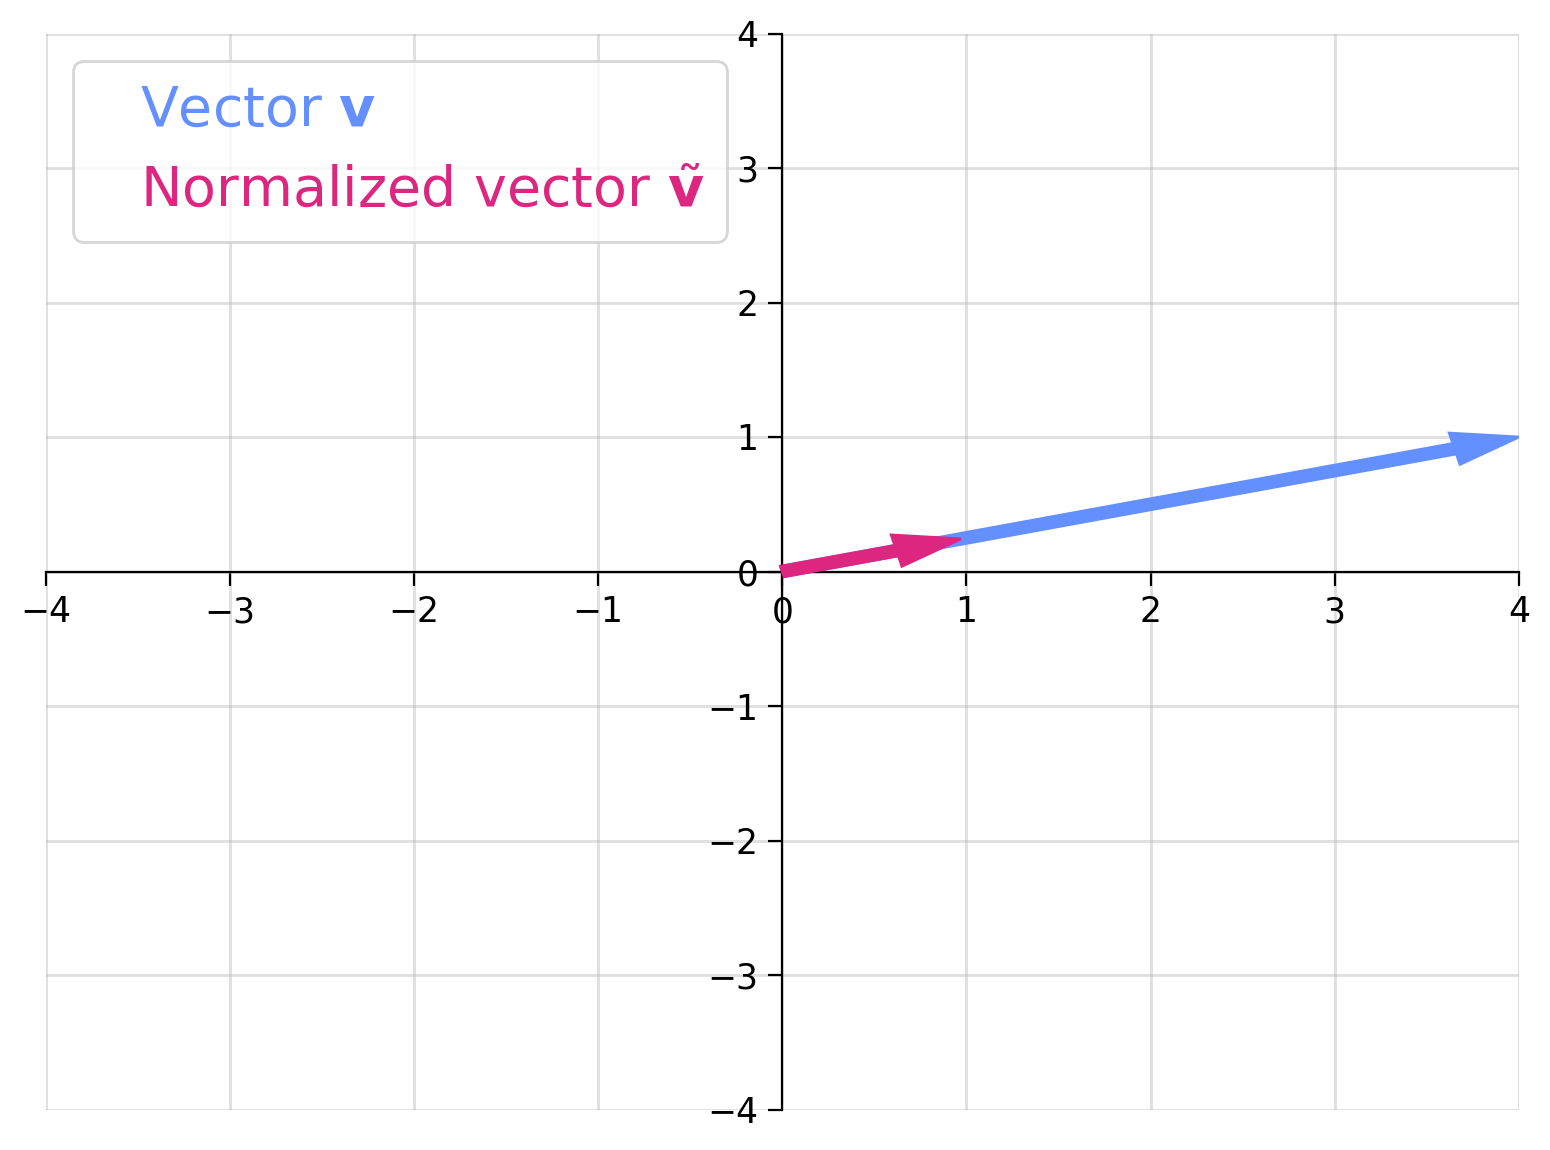

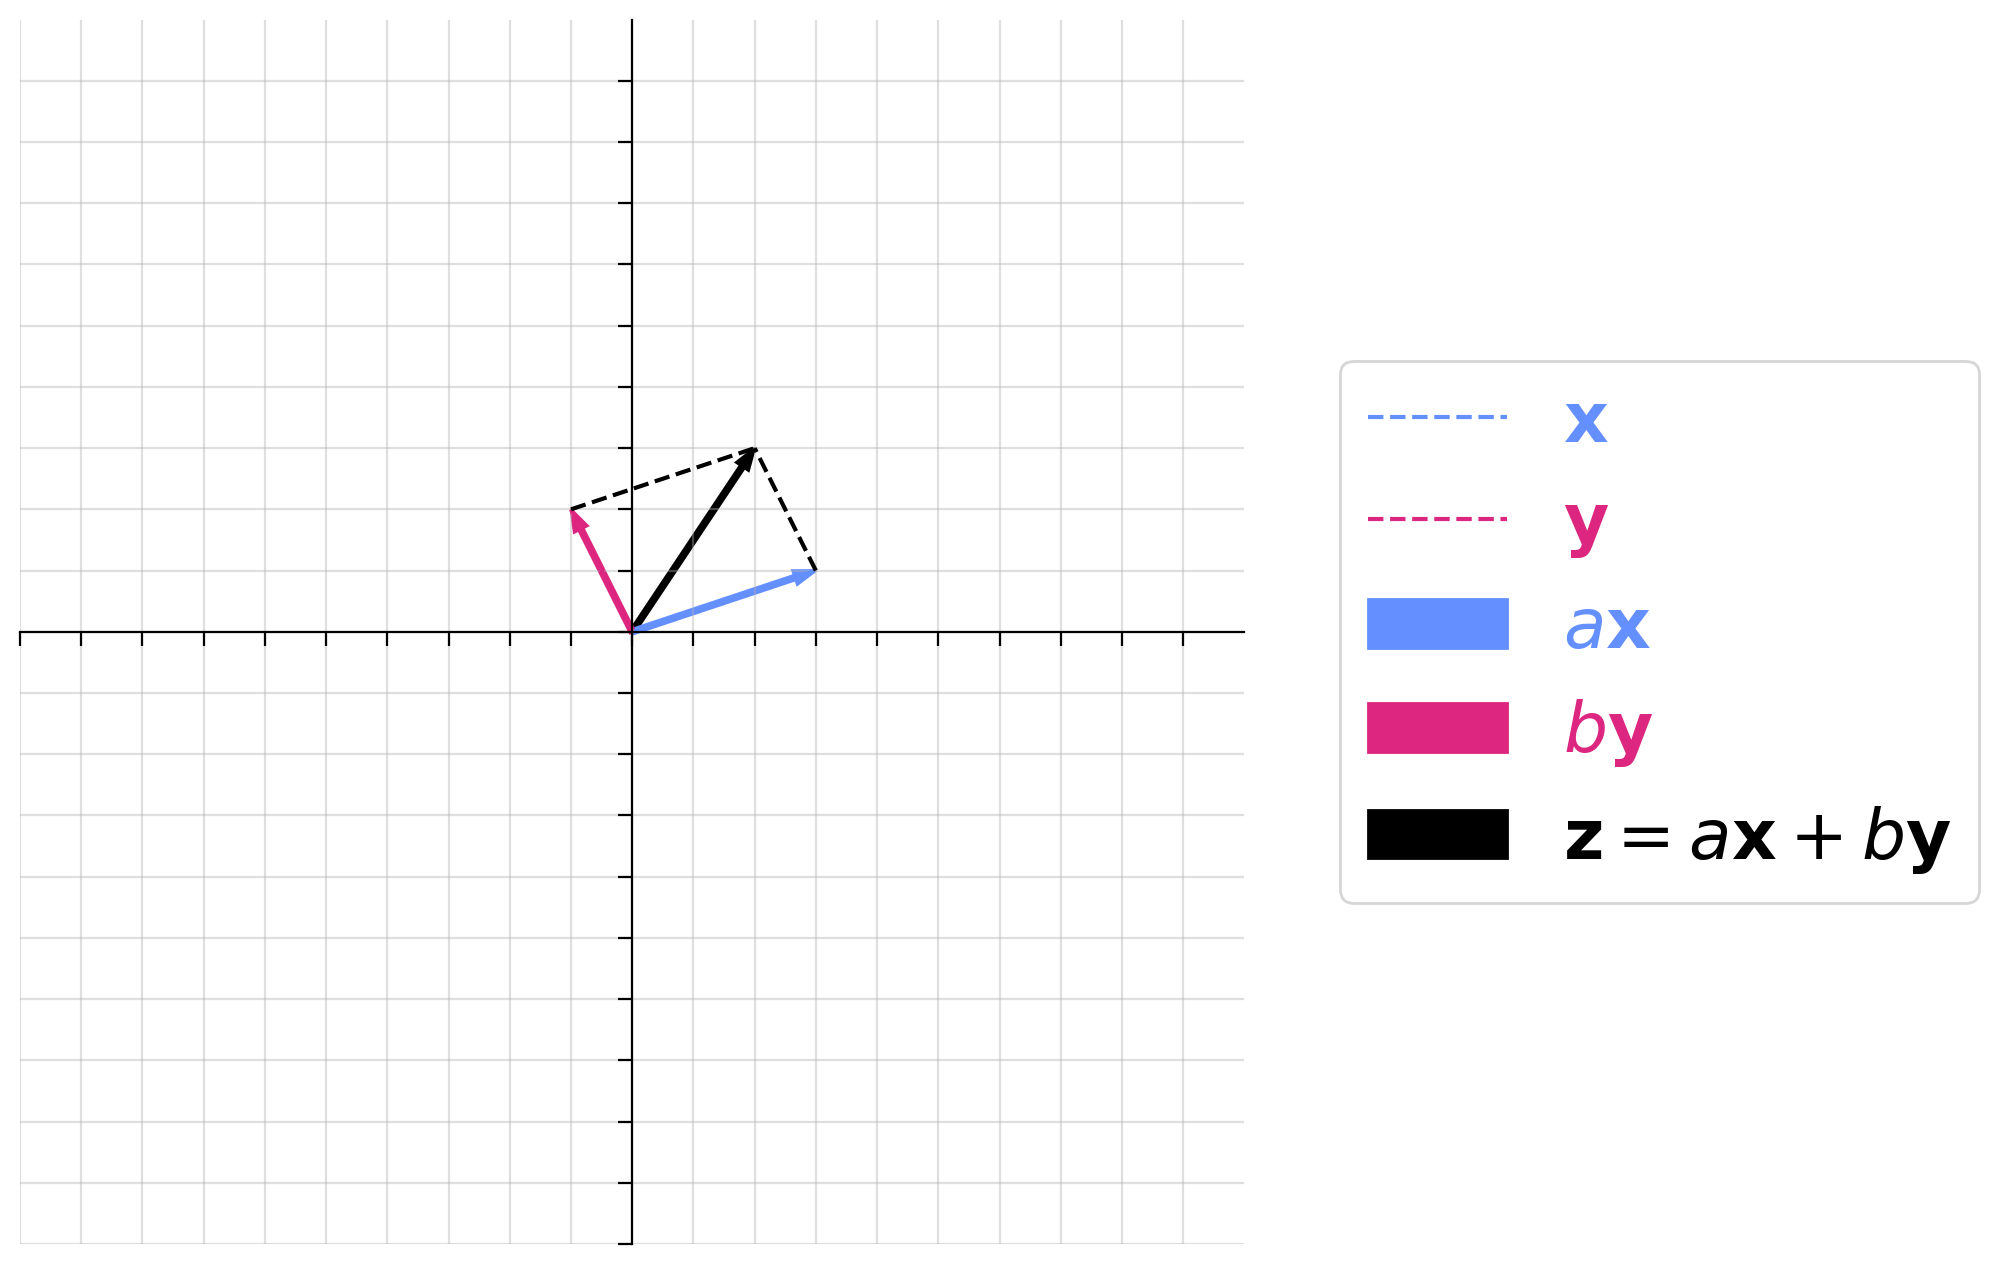

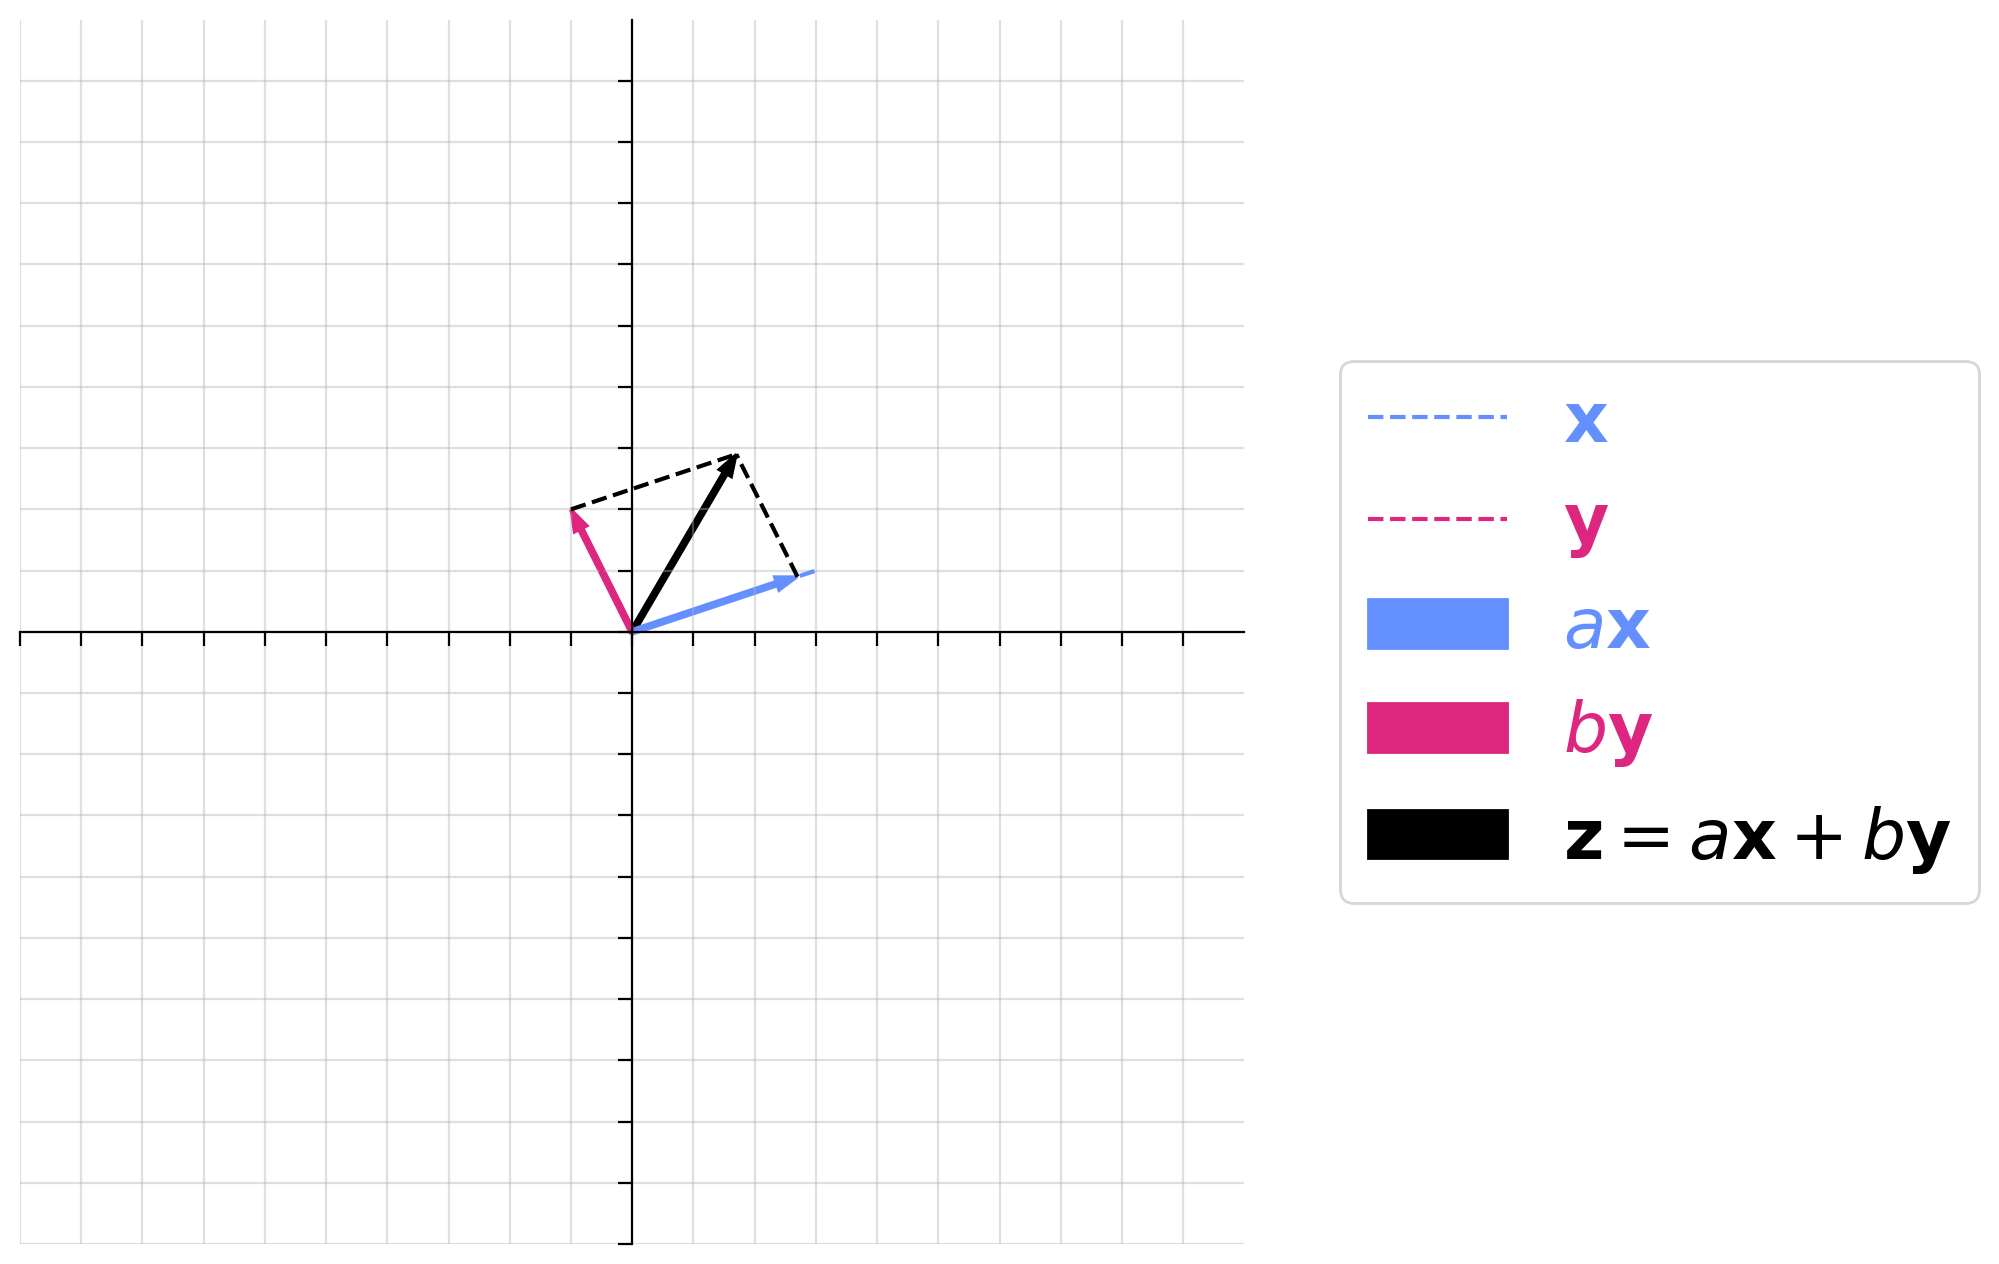

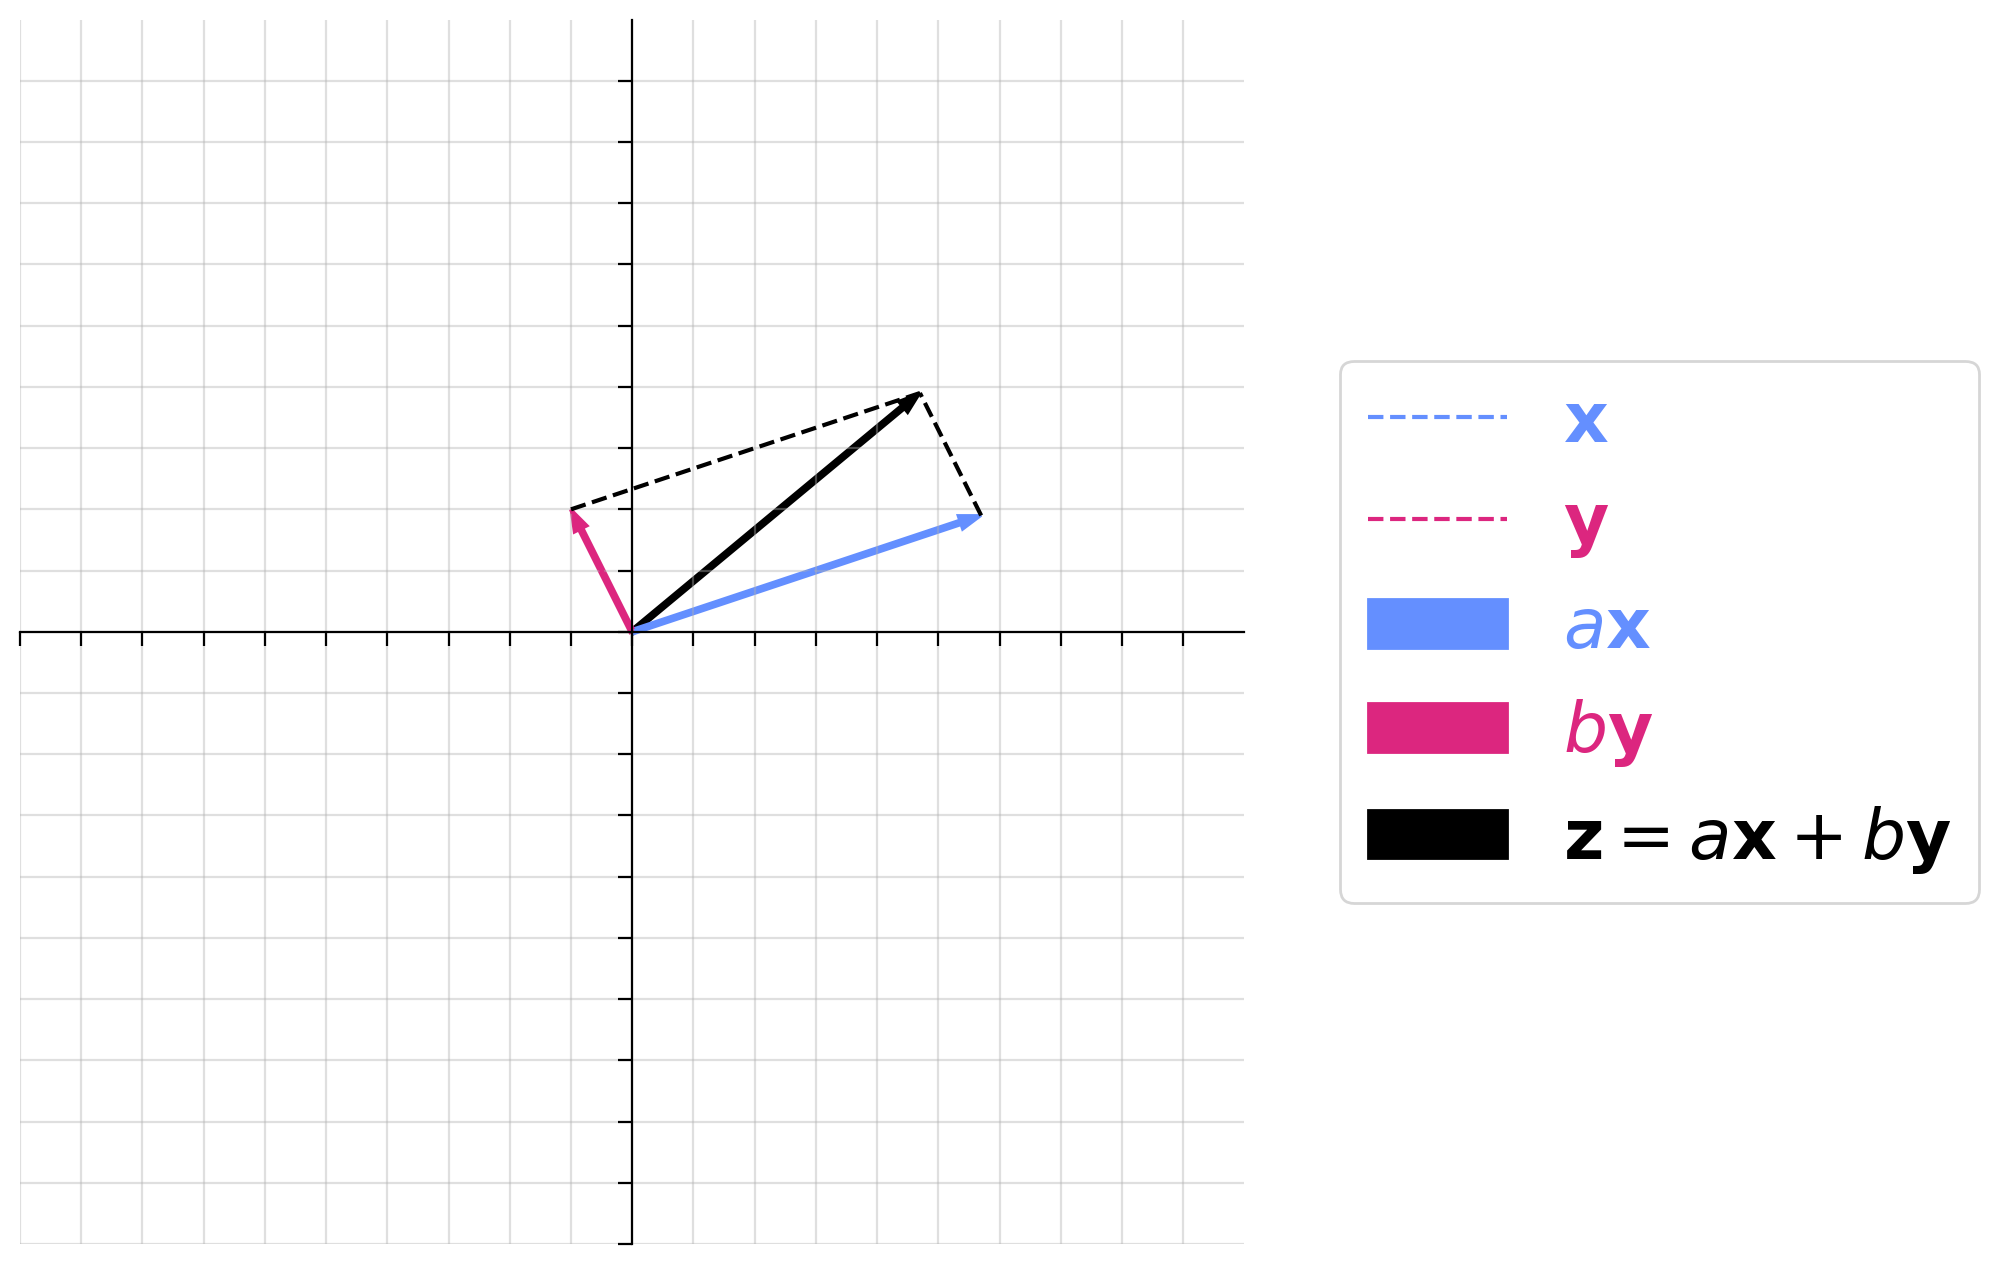

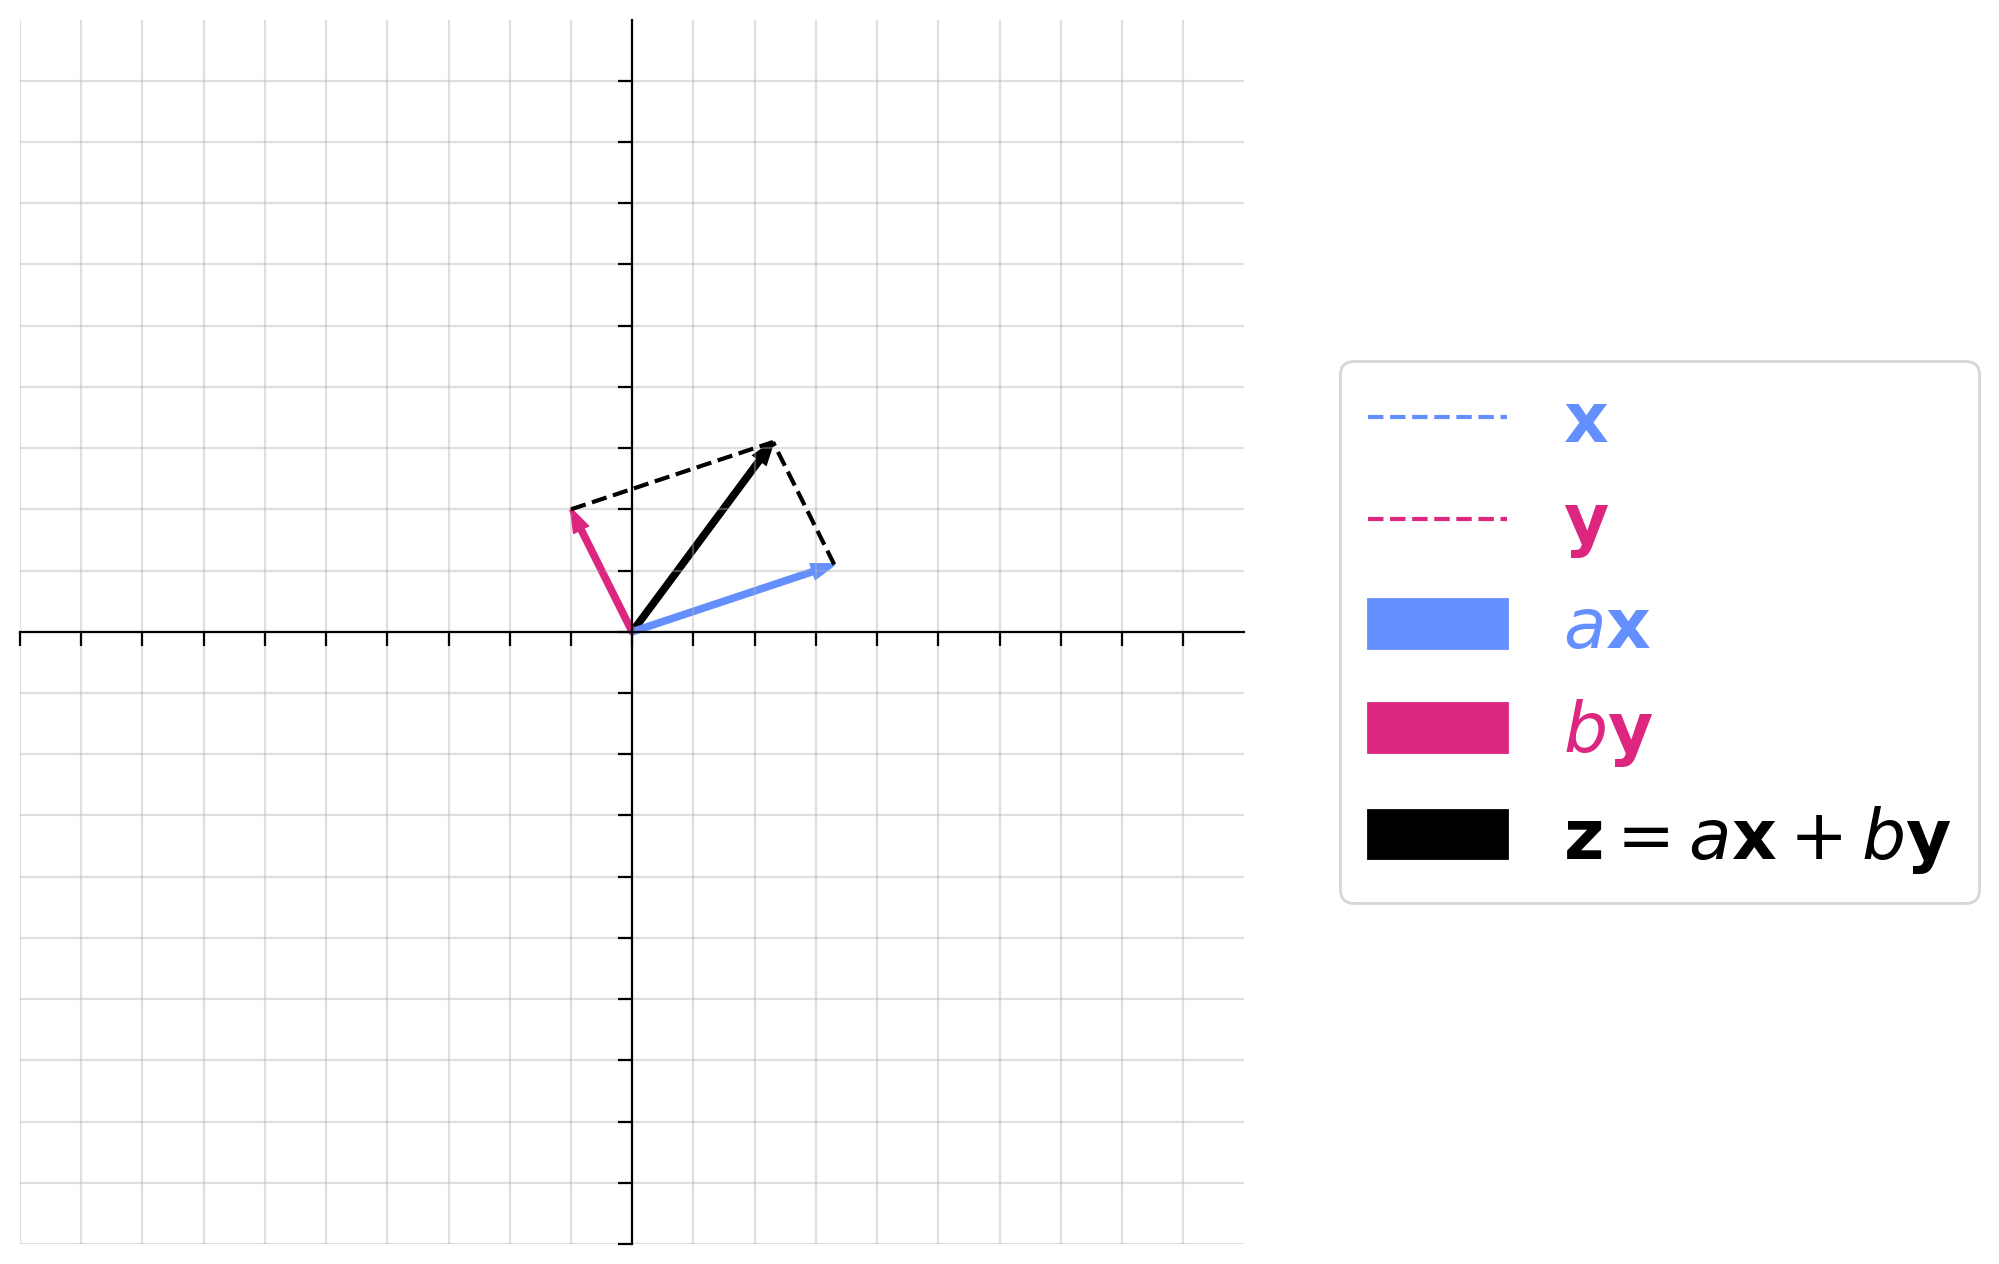

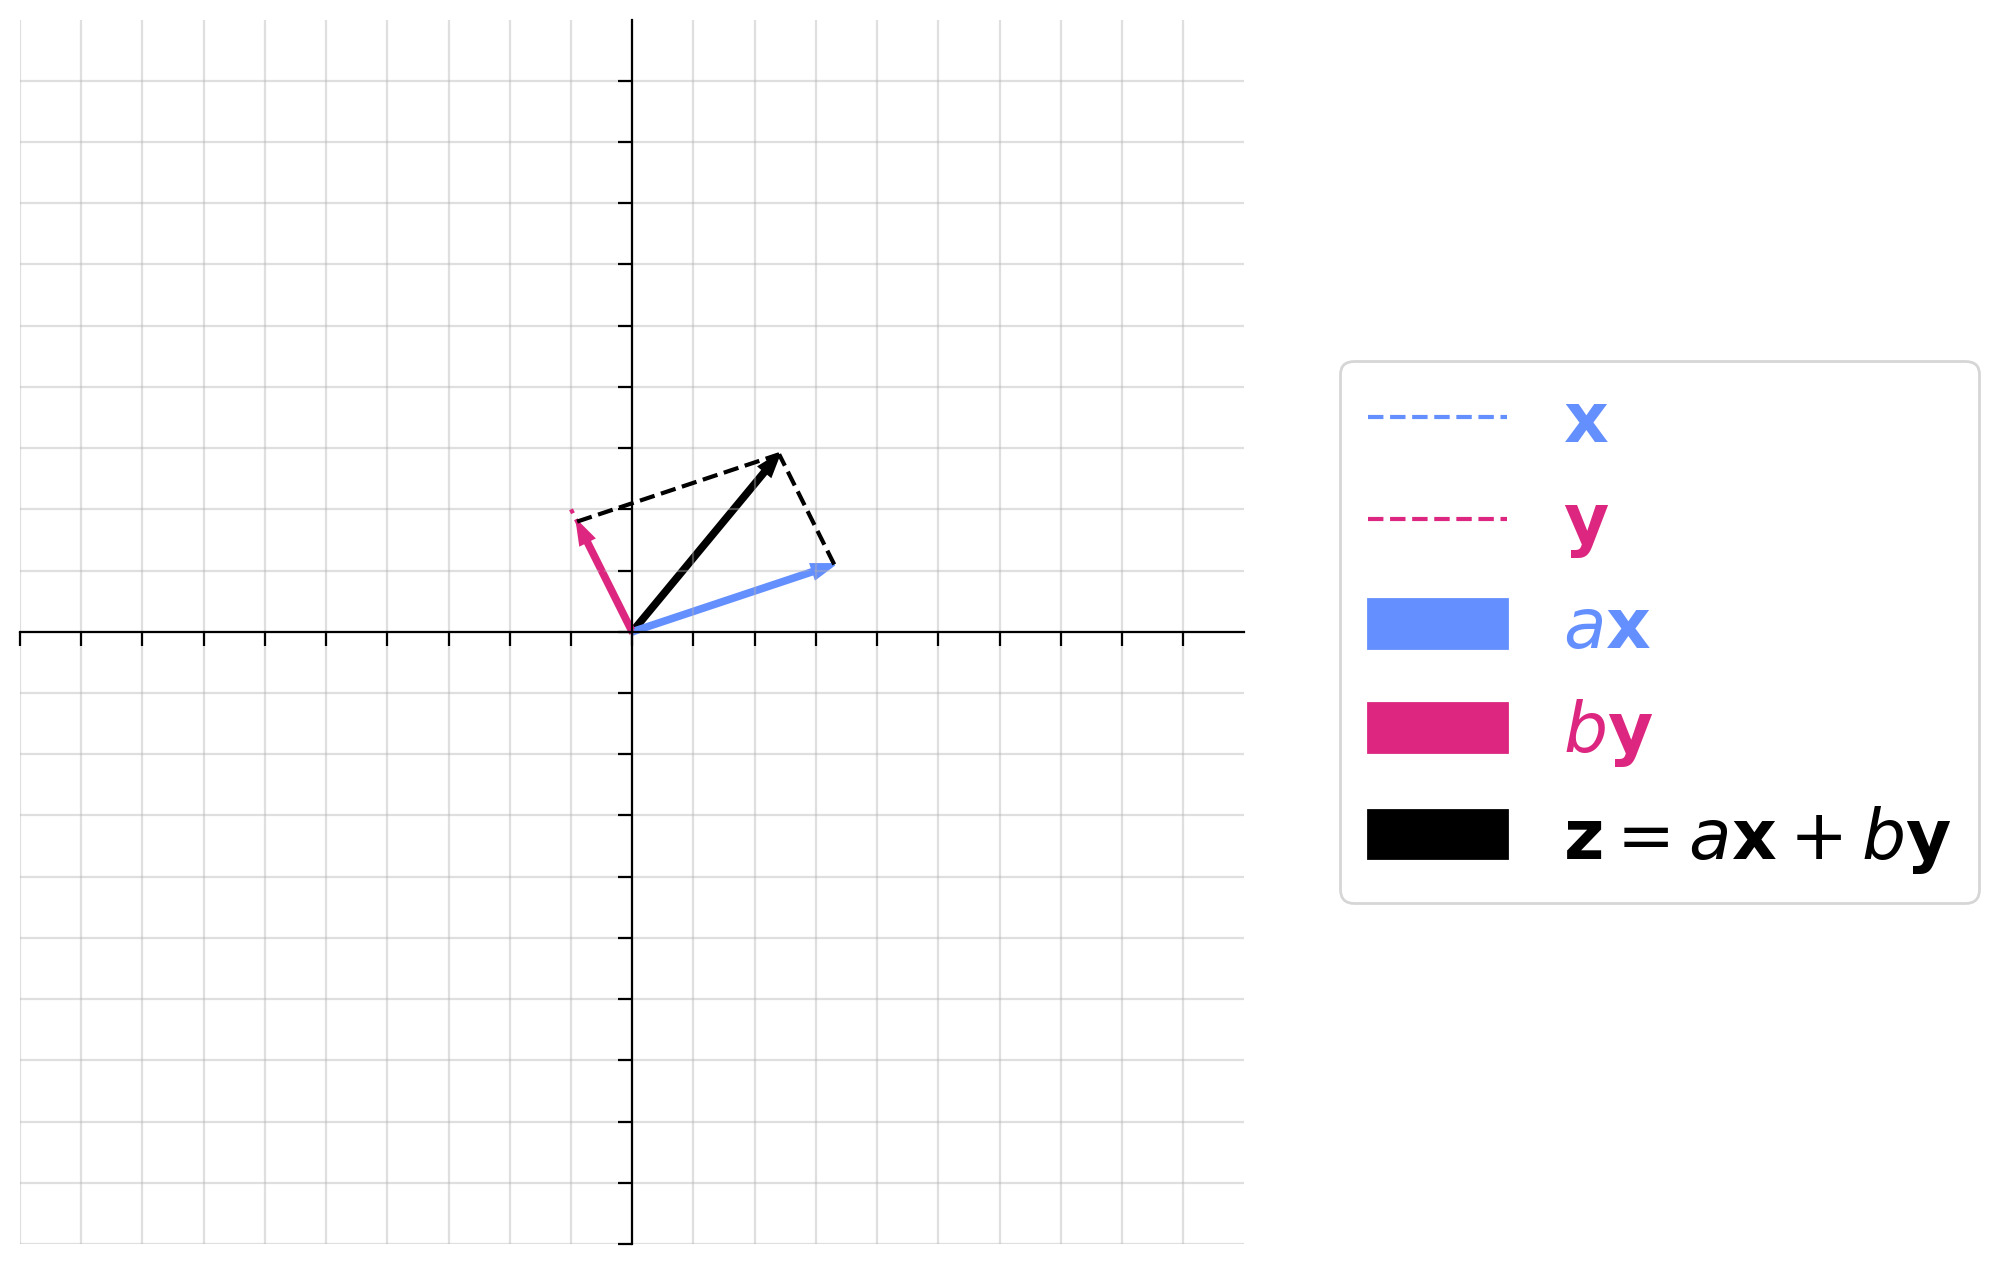

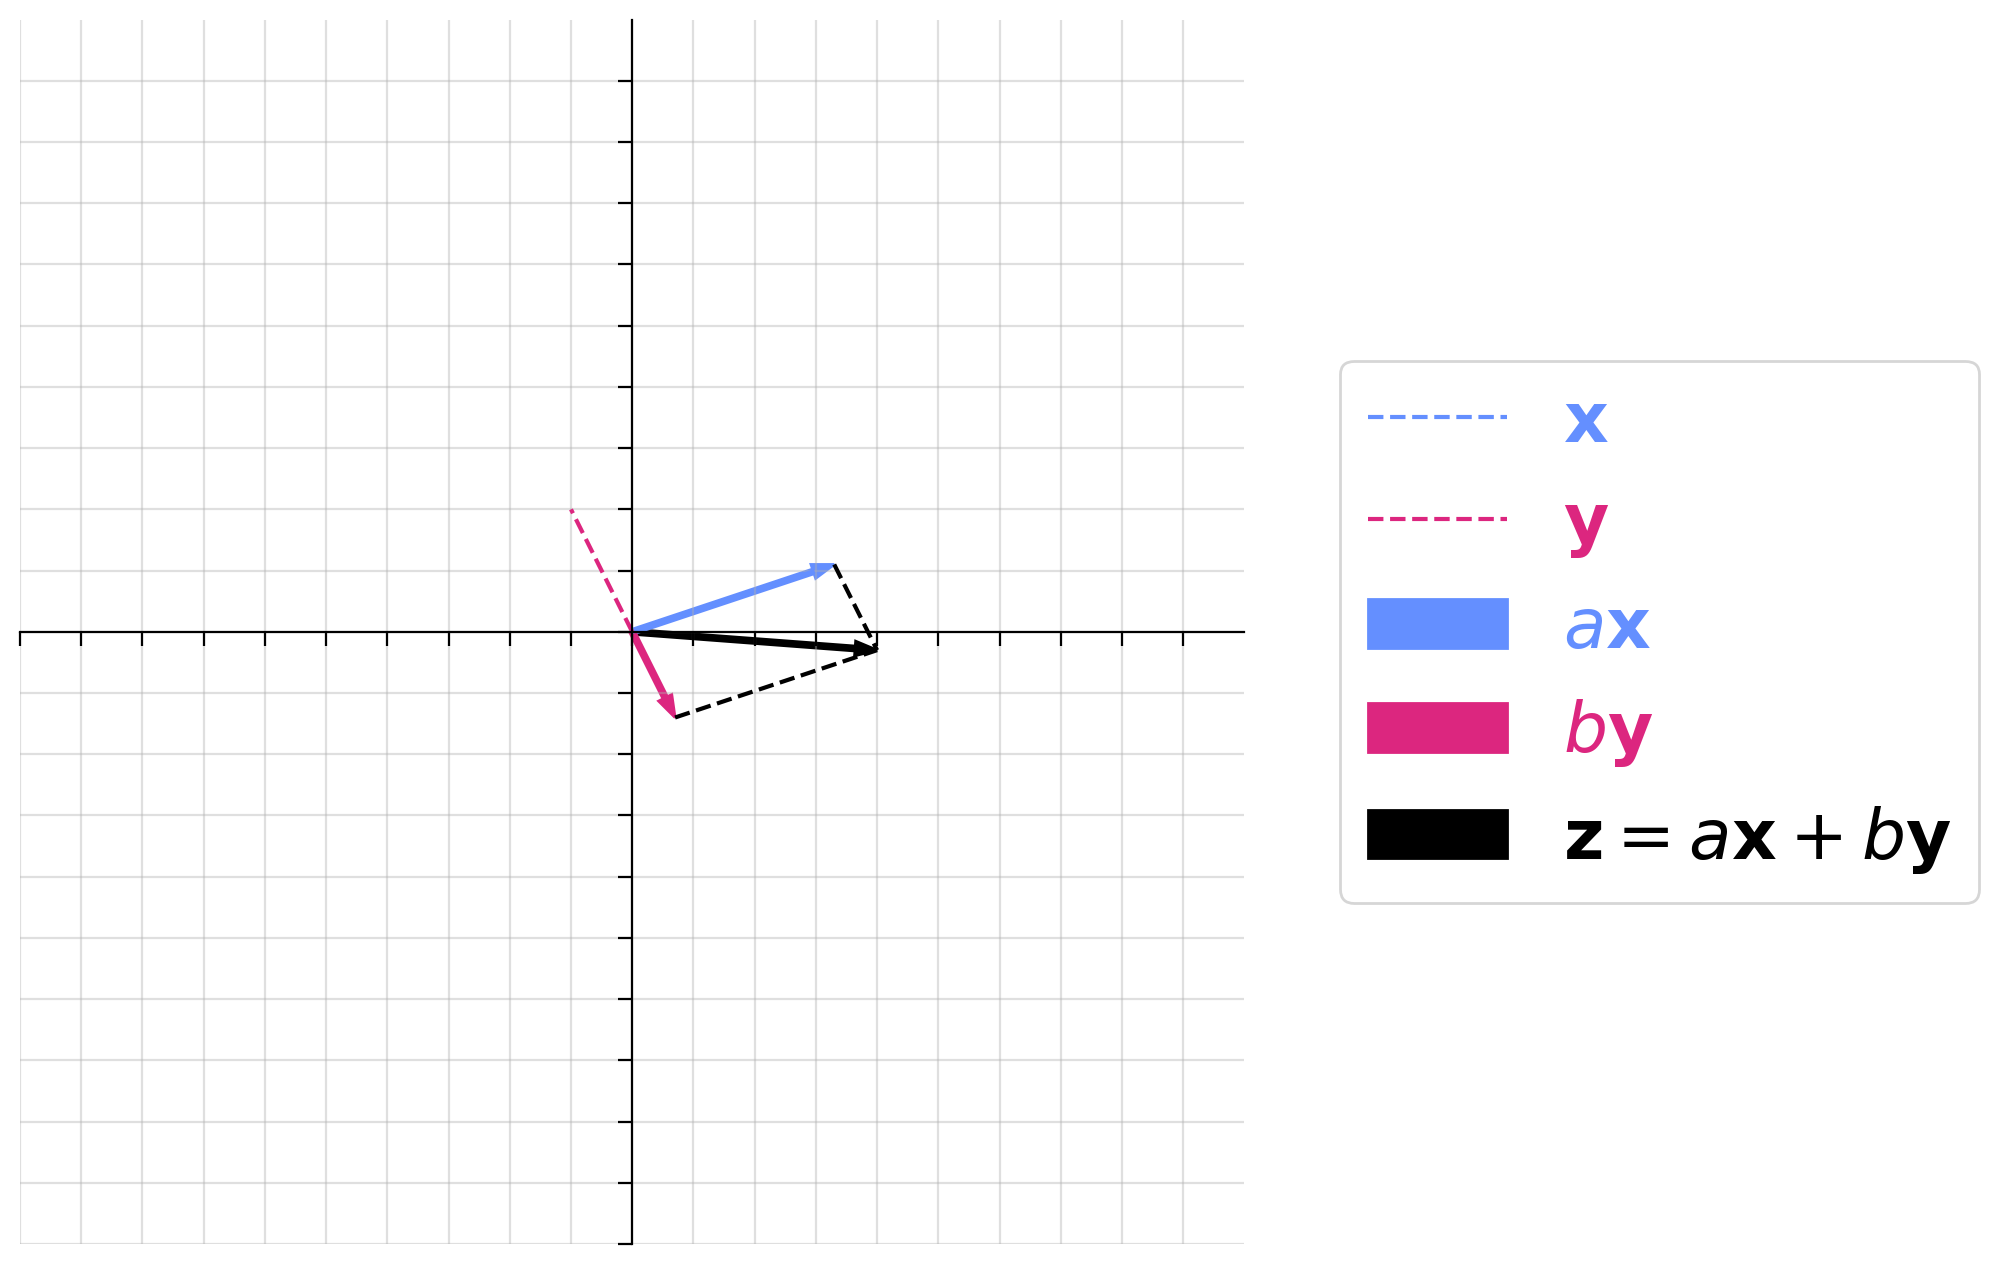

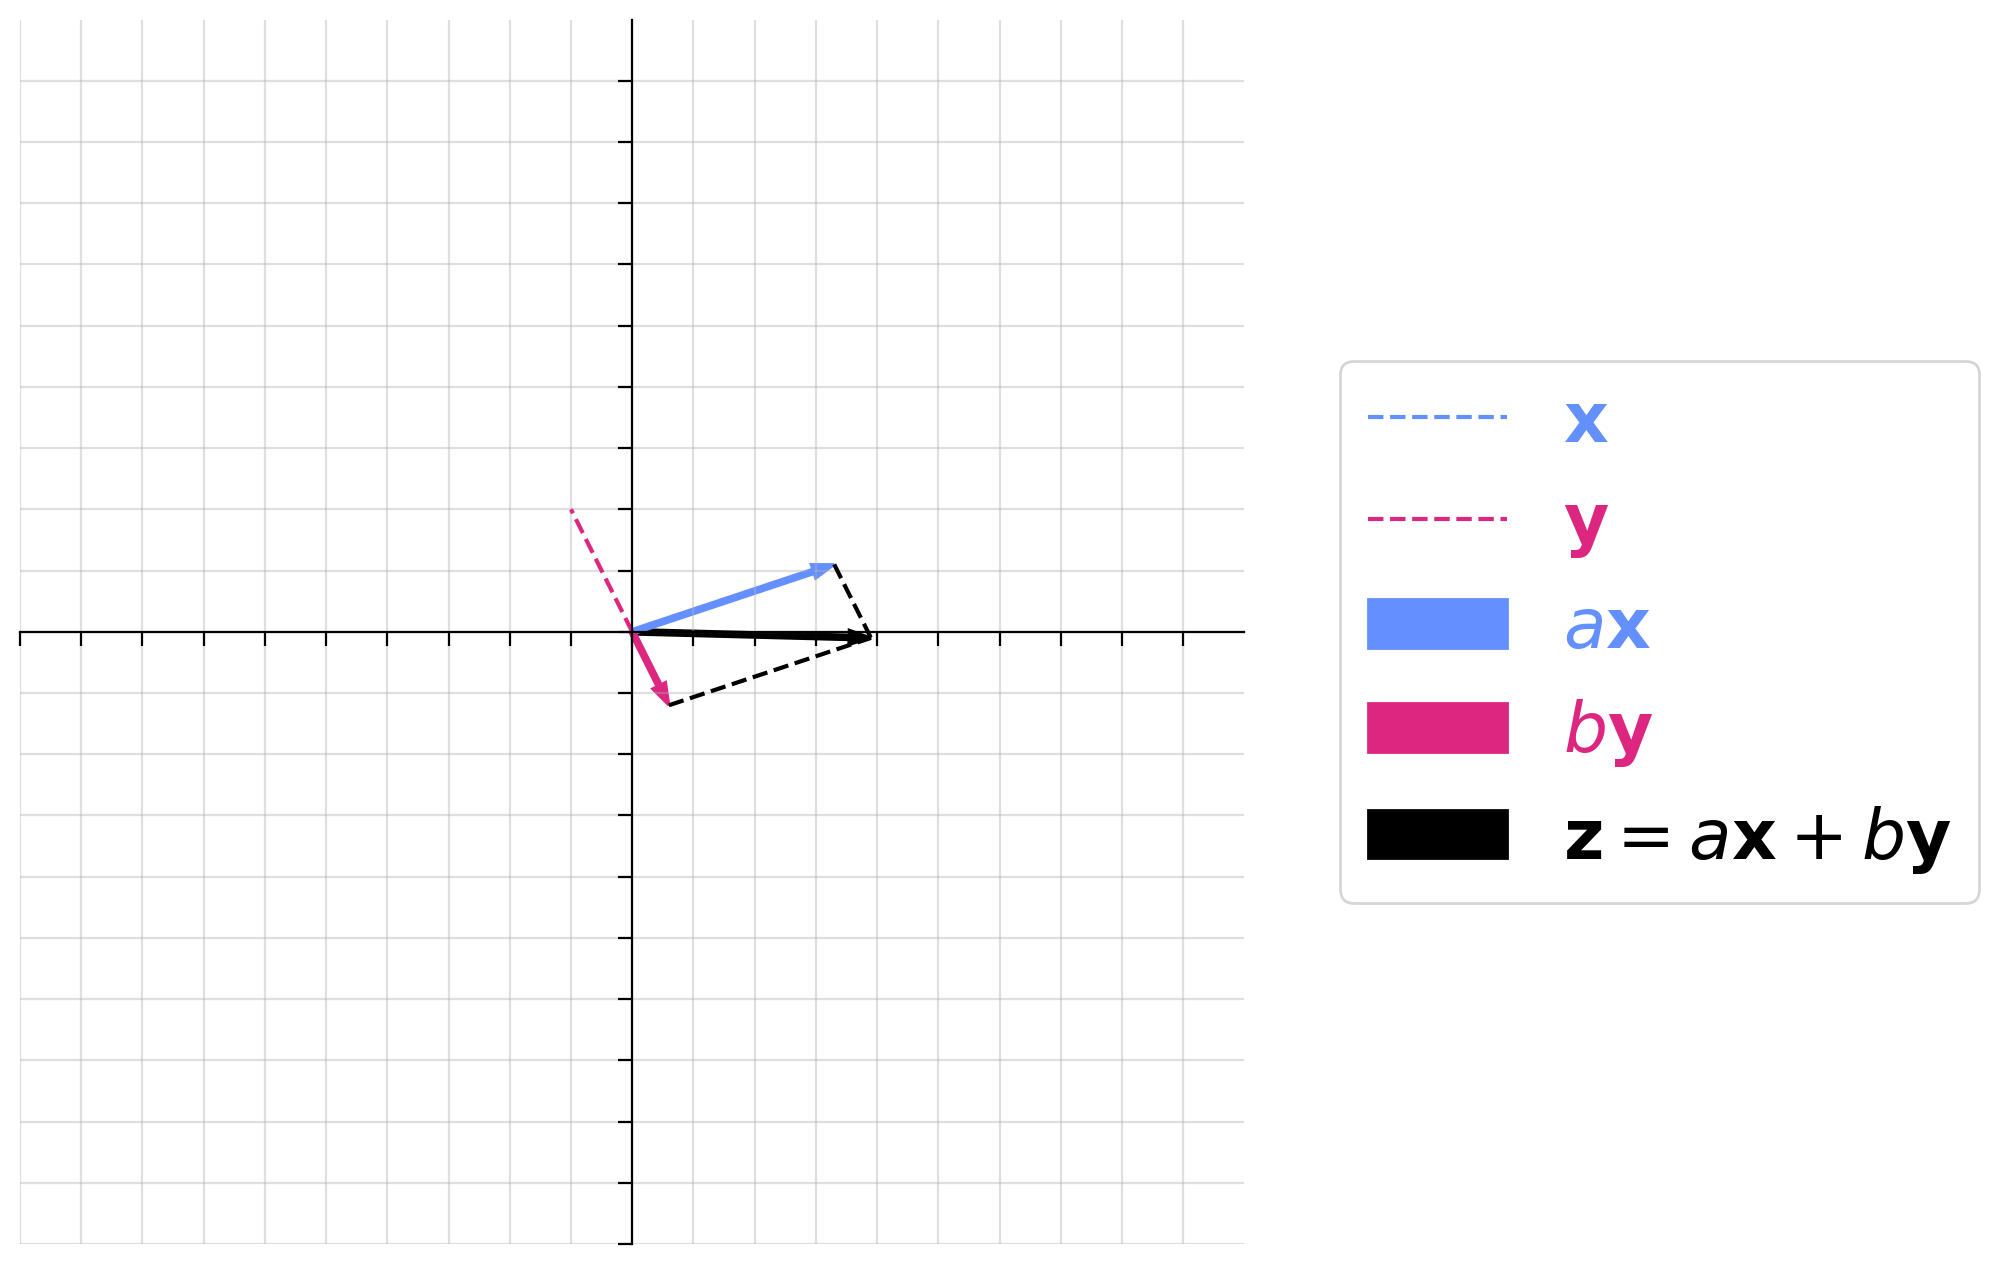

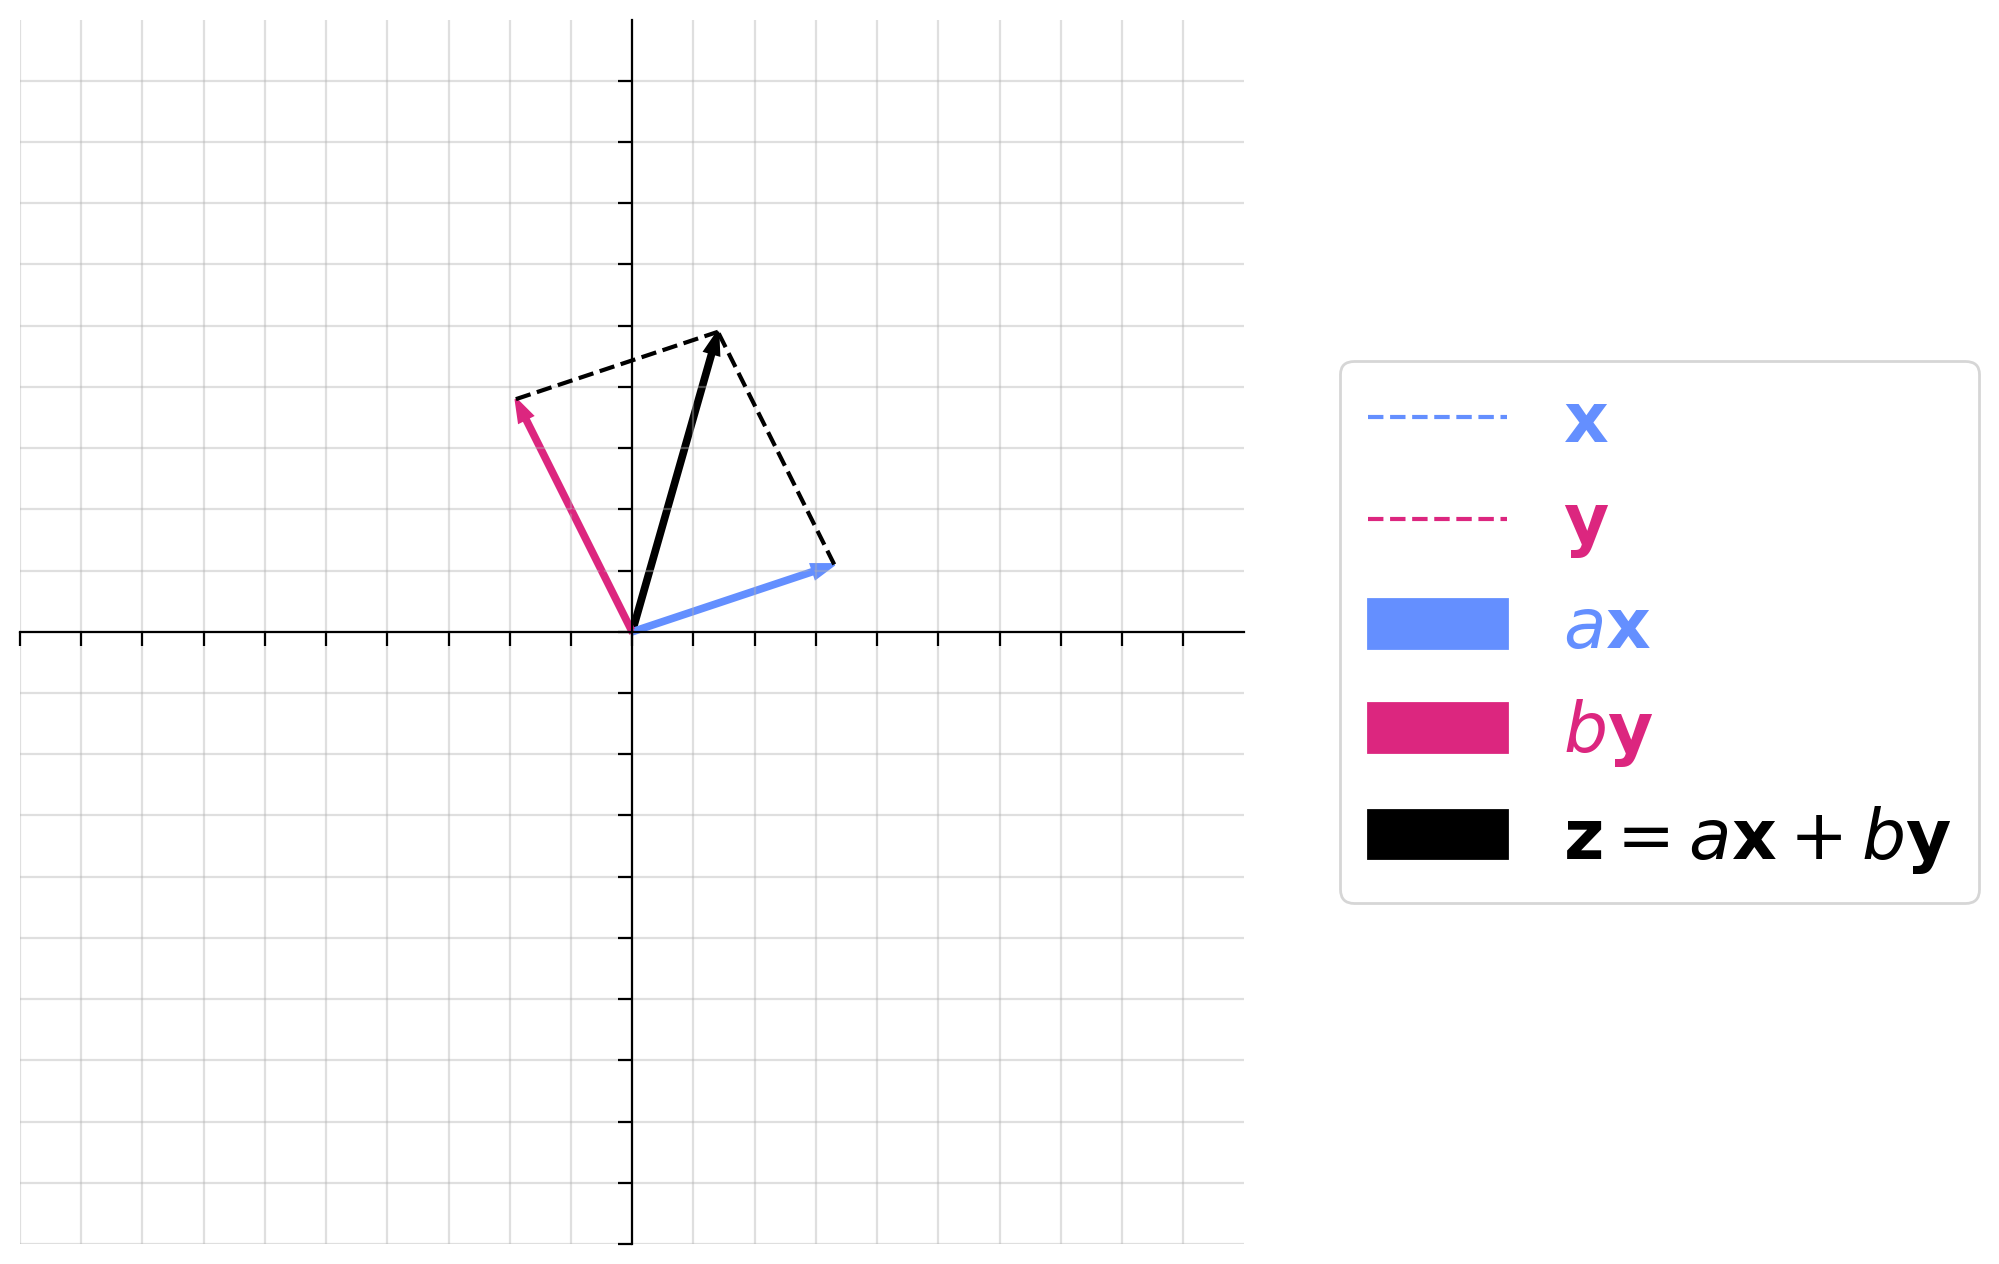

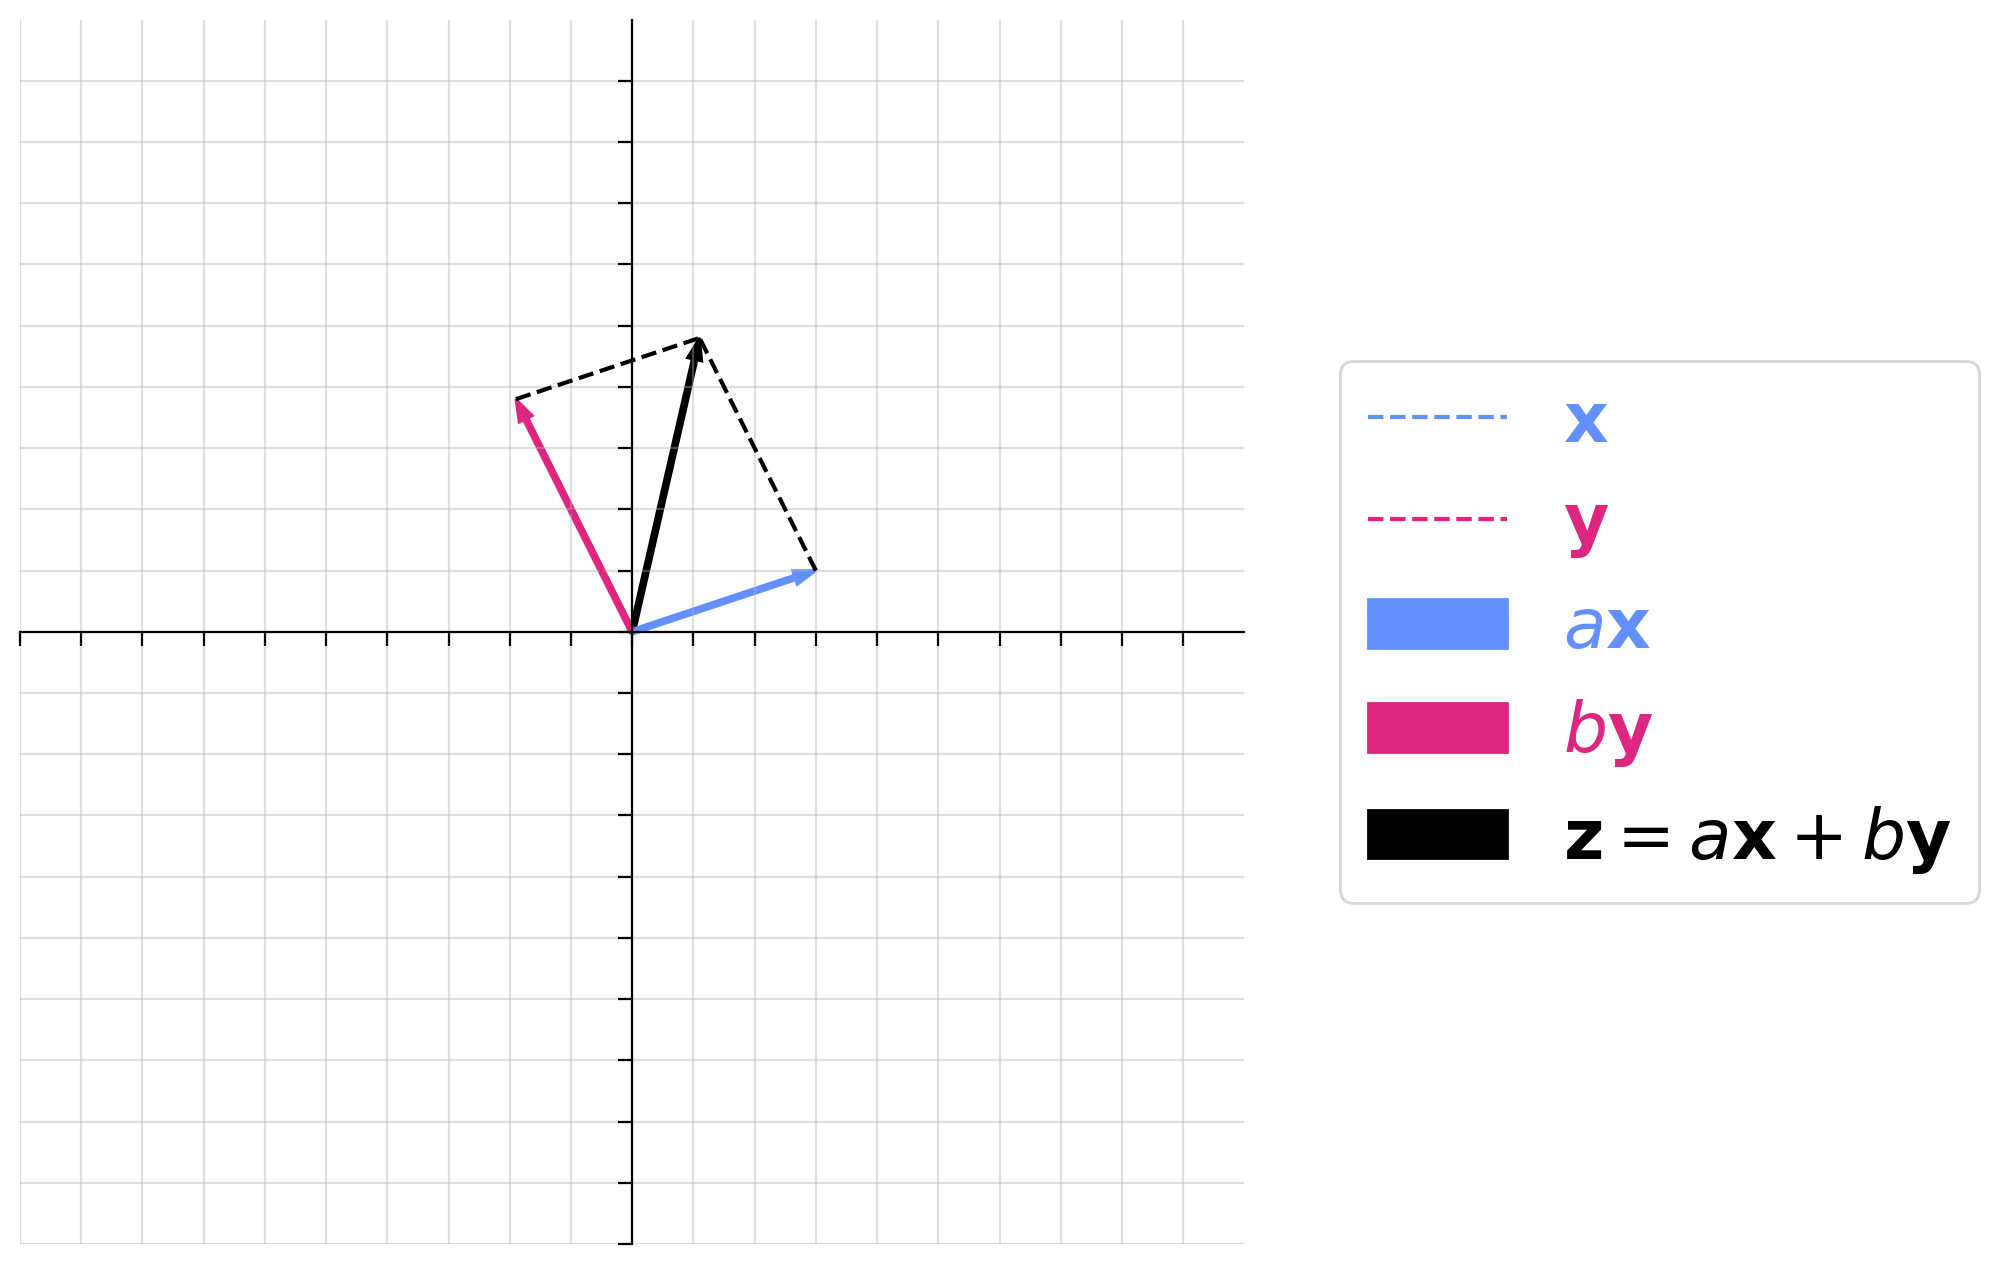

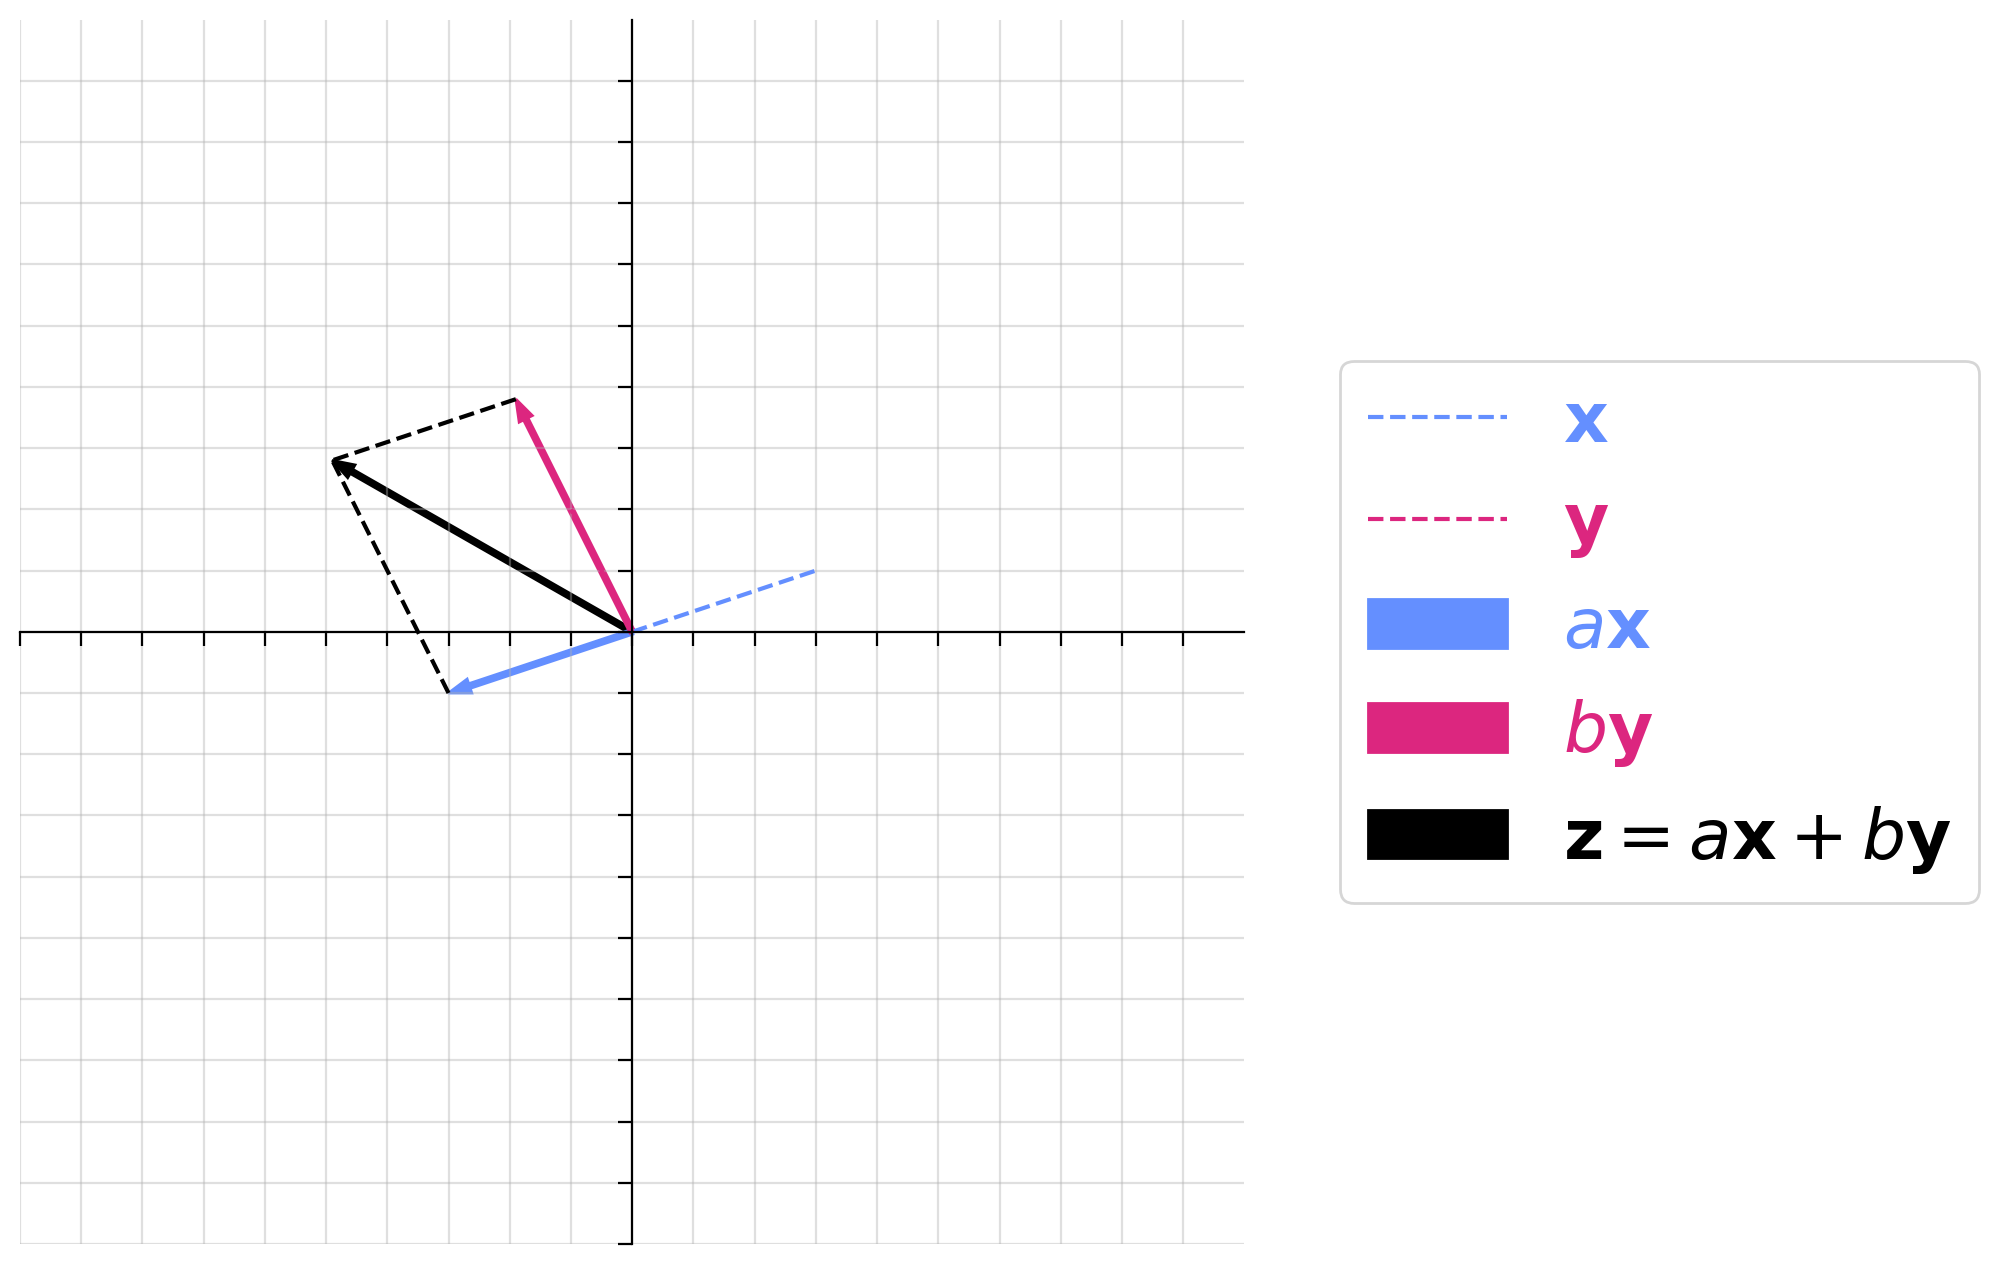

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# title figure settings
import ipywidgets as widgets   #interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format='retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# figure Plotting functions
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

def visualize_vectors(v,v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size(2,) with the vector coordinates
    v_unit(ndarray): array of size(2,) with the unit vector coordinates

  """
  fig, ax=plt.subplots()

  #Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['left'].set_position('zero')
  ax.set(xlim=[-6,6], ylim=[-6,6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  #plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF',
                   length_includes_head=True, zorder=2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08,
                        color='#DC267F',
                        length_includes_head=True, zorder=3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr],
                  [r"Vector $\mathbf{v}$",
                   r"Normalized vector $\tilde{\mathbf{v}}$"],
                  handlelength=0, fontsize=20, loc='upper left')
  for handle, label in zip(leg.legendHandles, leg.texts):
    label.set_color(handle.get_facecolor())
    handle.set_visible(False)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
      FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
      self._verts3d = xs, ys, zs

    def draw(self, renderer):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
      self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
      FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
      self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

def normalize_vector(input_vector):
  """ Normalizes a vector to length 1

  Inputs:
    input_vector (ndarray): array of shape (n_dim, ) where n_dim is the
        dimensionality of the vector

  Outputs:
    (ndarray): normalized vector of length 1
  """

  # Compute vector length (use np.linalg.norm)
  vector_length = np.linalg.norm(input_vector)

  # Create normalized vector
  normalized_vector = input_vector / vector_length

  return normalized_vector


# Create vector v from above (use np.array)
v =  np.array([4, 1])

# Call the function
v_unit = normalize_vector(v)

# Visualize the vectors

visualize_vectors(v, v_unit)


 #@markdown Make sure you execute this cell to enable the widget! Move the sliders for “a” and “b”. After releasing the slider, be patient for a couple of seconds to see the desired change.


def plot_arrows(x, y, a_times_x, b_times_y):
  fig, ax = plt.subplots(figsize=(10, 7))

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  ax.set_aspect('equal', adjustable='box')
  ax.set(xlim = [-10, 10], ylim = [-10, 10], xticks = np.arange(-10, 10), yticks = np.arange(-10, 10), xticklabels = [], yticklabels = [])

  ax.grid(alpha=.4)

  z = a_times_x + b_times_y
  z_arr = ax.arrow(0, 0, z[0], z[1], width=.08, color='k', length_includes_head = True);

  x_orig, = ax.plot([0, x[0]], [0, x[1]], '--', color='#648FFF')
  y_orig, = ax.plot([0, y[0]], [0, y[1]], '--',  color='#DC267F')

  ax_arr = ax.arrow(0, 0, a_times_x[0], a_times_x[1], width=.08, color='#648FFF', length_includes_head = True);
  by_arr = ax.arrow(0, 0, b_times_y[0], b_times_y[1], width=.08, color='#DC267F', length_includes_head = True);

  ax.plot([a_times_x[0], z[0]], [a_times_x[1], z[1]], '--k')
  ax.plot([b_times_y[0], z[0]], [b_times_y[1], z[1]], '--k')


  leg = ax.legend([x_orig, y_orig, ax_arr, by_arr, z_arr], [r"$\mathbf{x}$", r"$\mathbf{y}$", r"$a\mathbf{x}$", r"$b\mathbf{y}$", r"$\mathbf{z} = a\mathbf{x} + b\mathbf{y}$"], handlelength = 2, fontsize = 25, loc = 'center left', bbox_to_anchor=(1.05, .5))
  for handle, label in zip(leg.legendHandles, leg.texts):
      try:
          label.set_color(handle.get_facecolor())
      except:
          label.set_color(handle.get_color())
      #handle.set_visible(False)

@widgets.interact(a = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1), b = widgets.FloatSlider(value=1.0, min=-2, max=2, step=0.1))
def plot_linear_combination(a, b):
  x = np.array([3, 1])
  y = np.array([-1, 2])

  plot_arrows(x, y, a*x, b*y)


In [15]:
# @markdown Execute this cell to visualize vectors
import numpy as np
import matplotlib.pyplot as plt
# title figure settings
import ipywidgets as widgets   #interactive display
from ipywidgets import fixed
%config InlineBackend.figure_format='retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# figure Plotting functions
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
a = Arrow3D([0, 4], [0, 2],
                [0, 0], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#648FFF")

ax.add_artist(a)
b = Arrow3D([0, 1], [0, 0],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#785EF0")

ax.add_artist(b)
c = Arrow3D([0, 5], [0, 2],
                [0, 3], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#DC267F")

ax.add_artist(c)
d = Arrow3D([0, 3], [0, 3],
                [0, 2], mutation_scale=20,
                lw=3, arrowstyle="-|>", color="#FFB000")

ax.add_artist(d)

leg = ax.legend([a, b, c, d], ['a', 'b', 'c', 'd'], handlelength = 0, fontsize = 20, loc = 'upper left')
for handle, label in zip(leg.legendHandles, leg.texts):
  label.set_color(handle.get_facecolor())
  handle.set_visible(False)
ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5]); #, xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');

Error in callback <function _draw_all_if_interactive at 0x7f565388e0e0> (for post_execute):


<ipython-input-15-d11746fd3a83>:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle, label in zip(leg.legendHandles, leg.texts):


TypeError: ignored

TypeError: ignored

<Figure size 800x600 with 1 Axes>

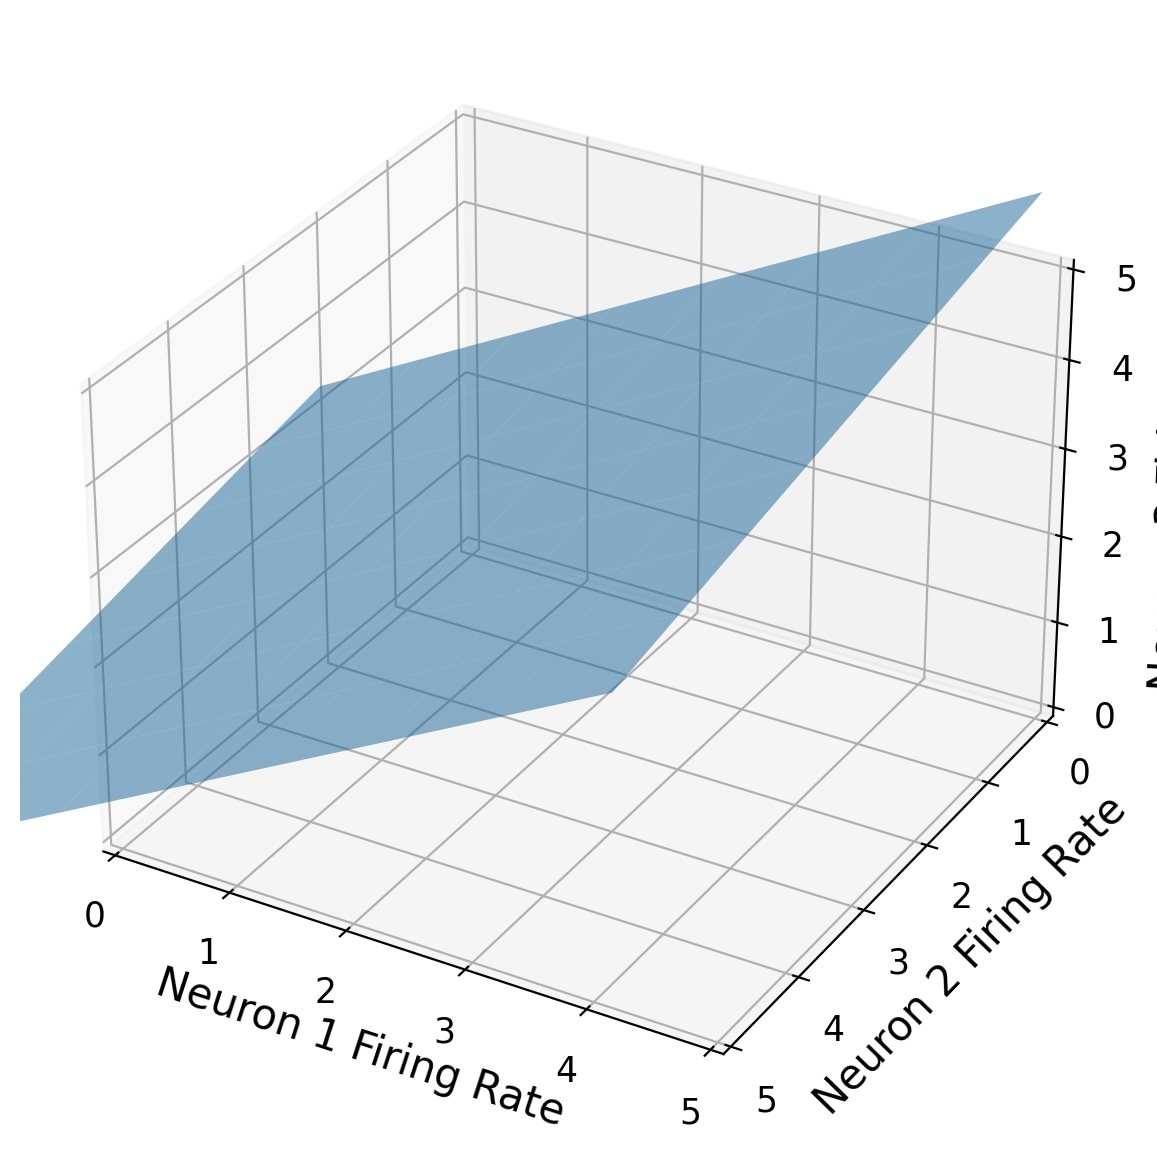

In [16]:
# @markdown Execute this cell to see figure

fig = plt.figure()

# add axes
ax = fig.add_subplot(111,projection='3d')

xx, yy = np.meshgrid(range(-4, 4), range(-4, 4))
z = .7*xx + -.2*yy

# plot the plane
ax.plot_surface(xx, yy, z, alpha=0.5)

ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5], xlabel = 'Neuron 1 Firing Rate',  ylabel = 'Neuron 2 Firing Rate', zlabel = 'Neuron 3 Firing Rate');
#ax.invert_xaxis()

interactive(children=(FloatSlider(value=1.0, description='neuron1_firing', max=4.0, min=-4.0, step=1.0, style=…

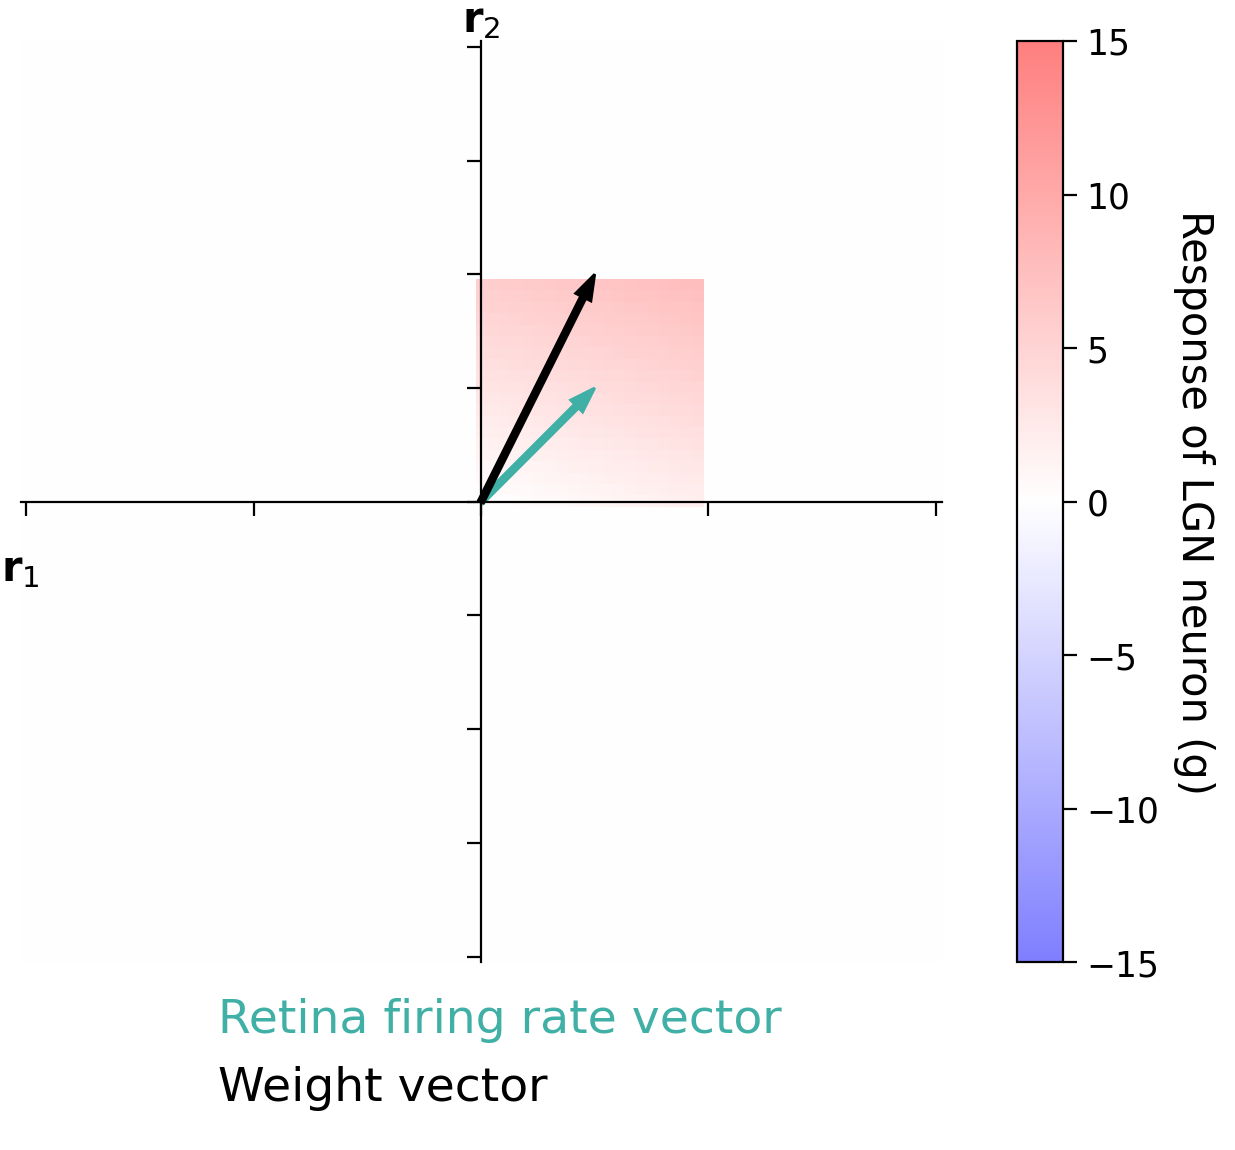

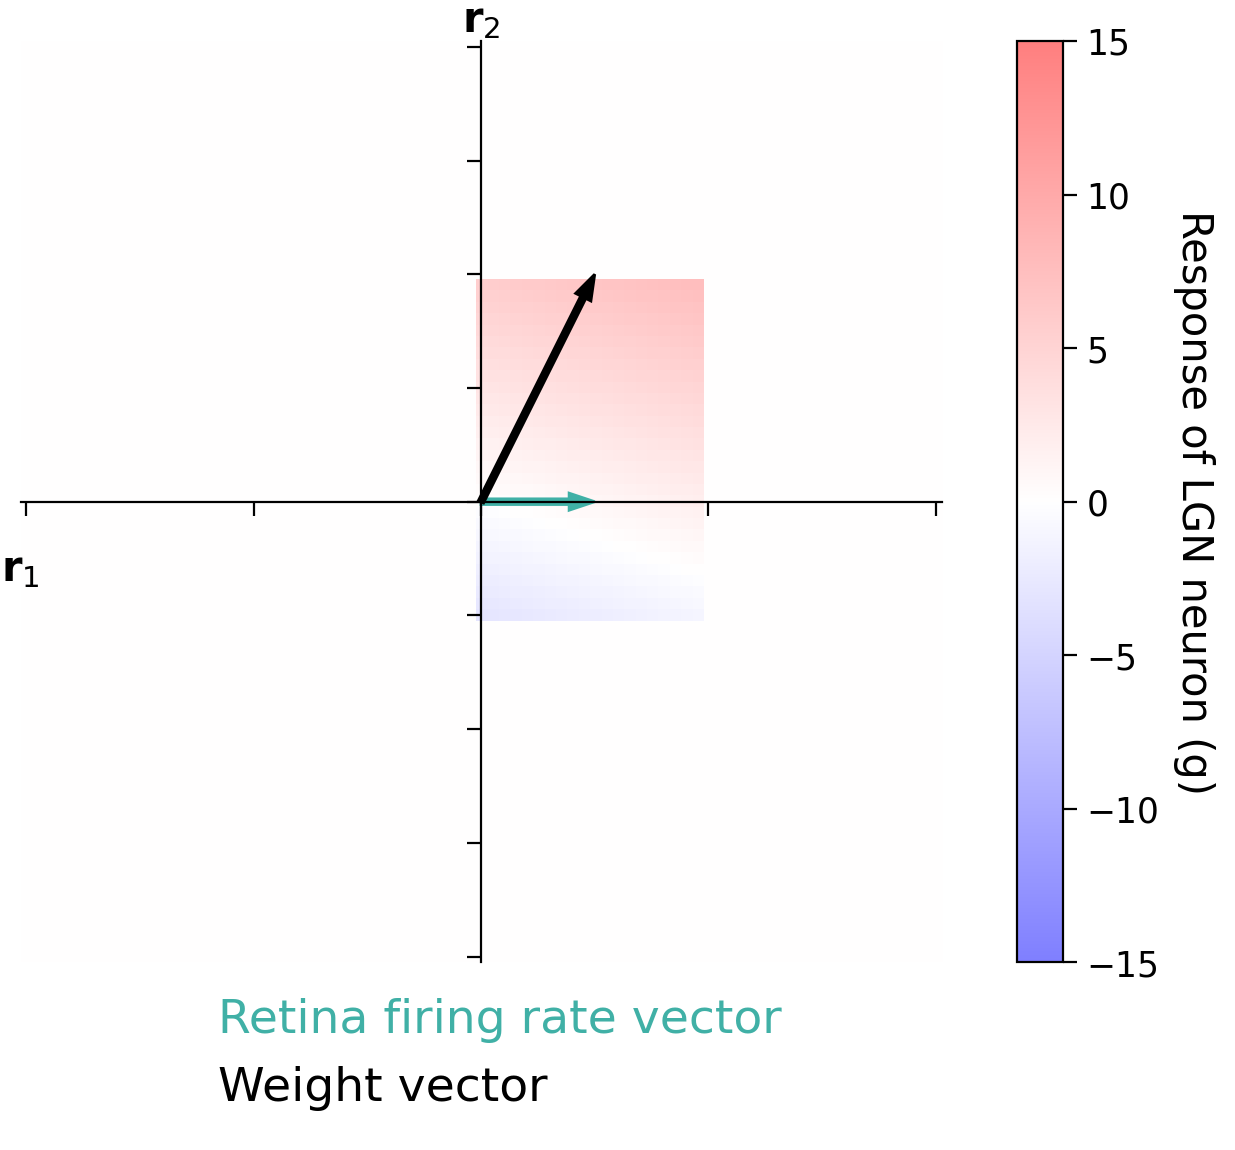

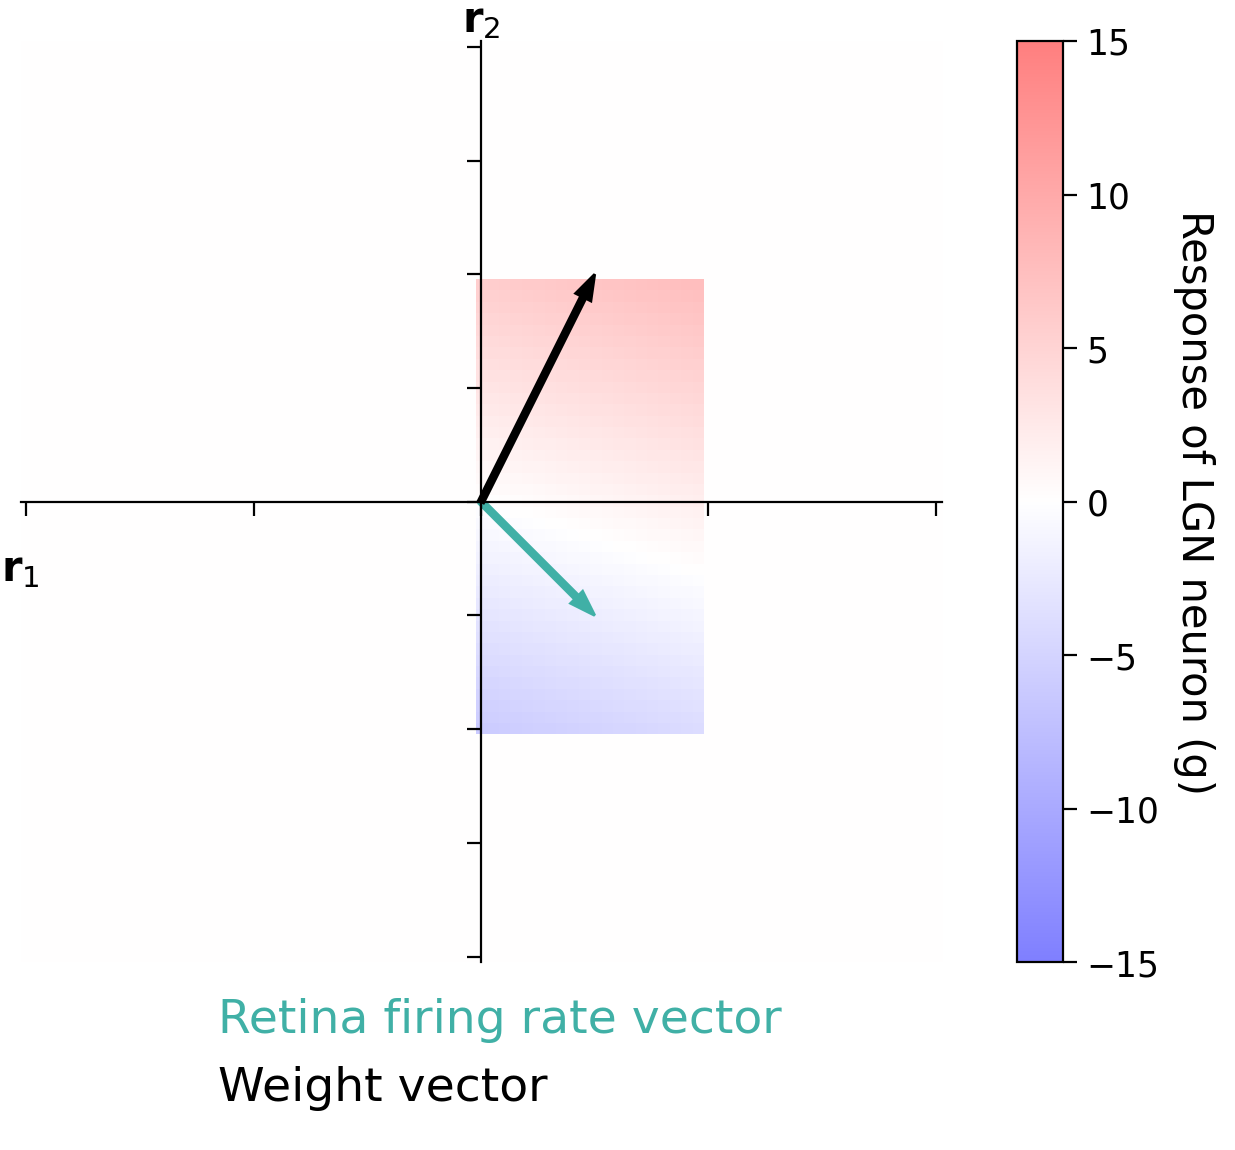

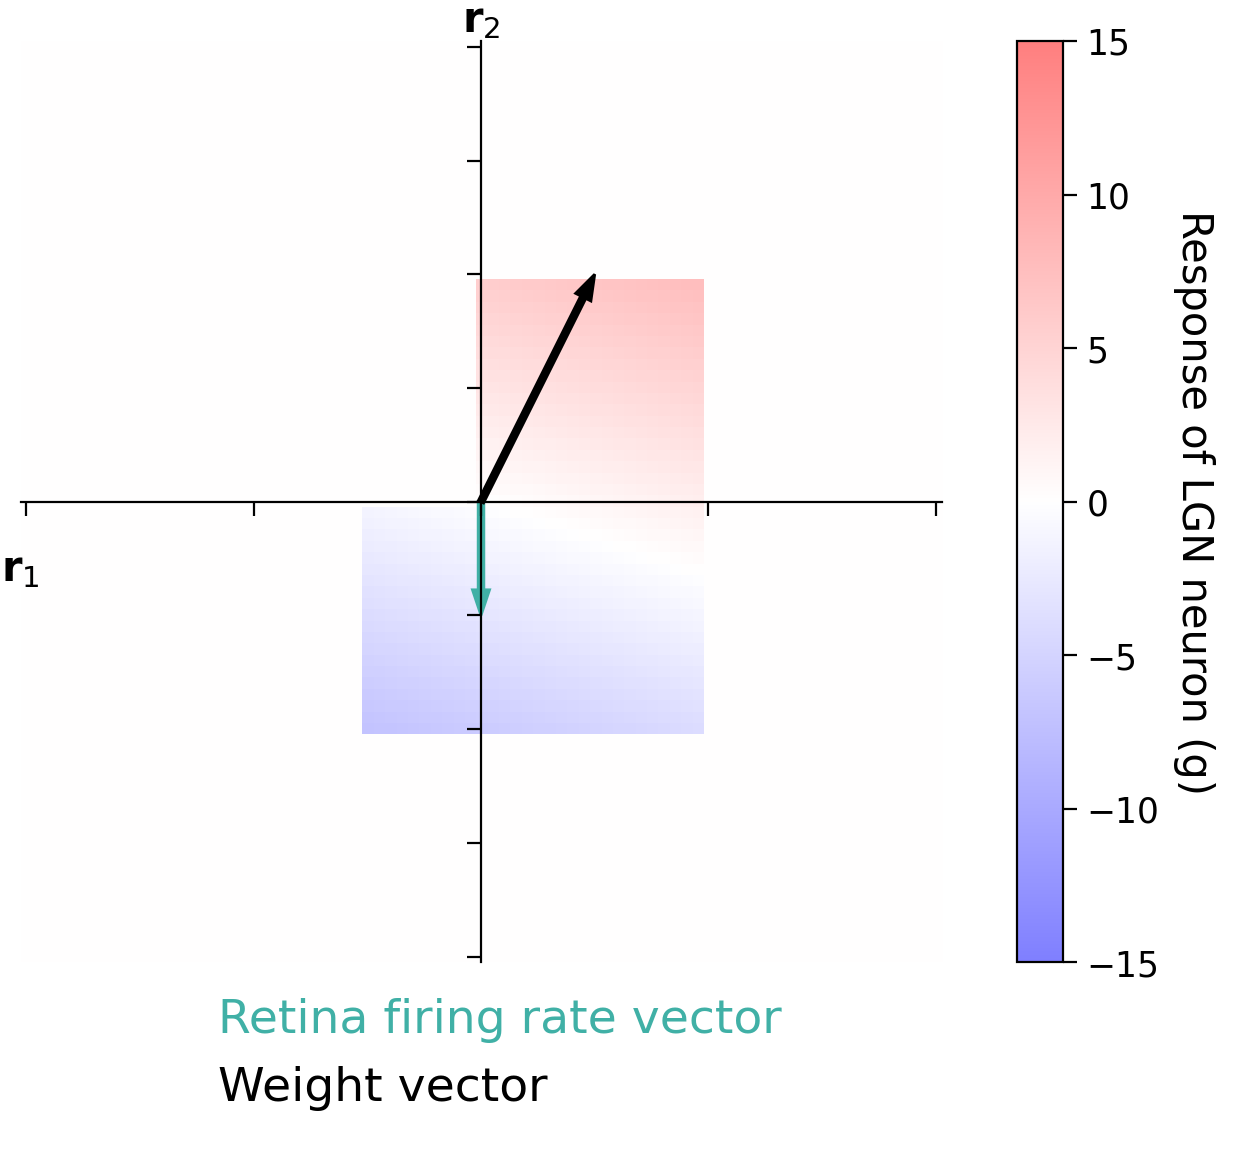

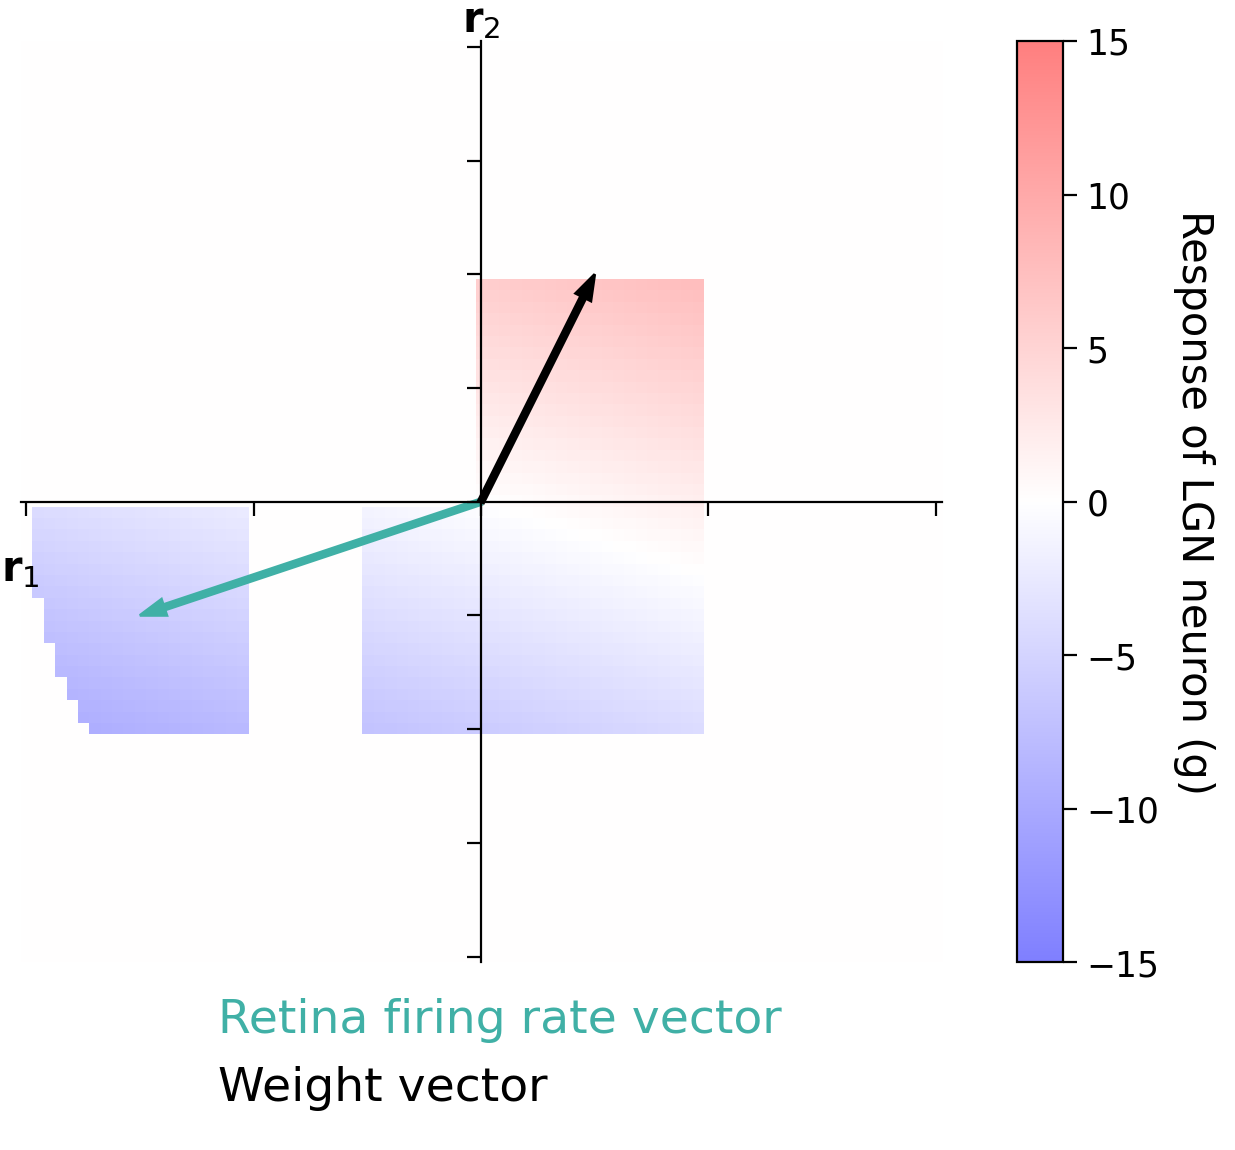

In [17]:
#@markdown Make sure you execute this cell to enable the widget!

step = .1
x_vec = np.arange(-4, 4.001, step)
y_vec = np.arange(-4, 4.001, step)
n_pixels = x_vec.shape[0]


heatmap = np.zeros((n_pixels, n_pixels))
y = np.array([1, 3])
for i, coord1 in enumerate(x_vec):
  for j, coord2 in enumerate(x_vec):
    heatmap[i, j] = np.dot(np.array([coord1, coord2]), y)
circle_mask = np.zeros((n_pixels, n_pixels))

for i, coord_i in enumerate(x_vec):
  for j, coord_j in enumerate(y_vec):
    circle_mask[i, j] = np.sqrt(coord_i**2 + coord_j**2)

circle_mask = circle_mask < 4

heatmap = heatmap * circle_mask
mask = np.zeros((n_pixels, n_pixels))

def plot_heatmap(x, y, mask):

  fig, ax = plt.subplots()

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')

  heatmap[np.where(x_vec == x[0])[0], np.where(x_vec == x[1])[0]] = np.dot(x, y)

  masked_x = np.abs(x_vec - x[0]) < 1
  masked_y = np.abs(y_vec - x[1]) < 1
  mask += np.outer(masked_x, masked_y)
  mask = np.minimum(mask, 1)

  im = ax.imshow((heatmap * mask).T, vmin = -15, vmax = 15, origin = 'lower', alpha = .5, extent=[-n_pixels/2., n_pixels/2., -n_pixels/2., n_pixels/2. ], cmap = 'bwr')
  cbar = plt.colorbar(im, ax = ax)
  cbar.set_label('Response of LGN neuron (g)', rotation=270, labelpad=20)
  ax.set(xticklabels = [], yticklabels = [], xlabel = '$\mathbf{r}_1$')
  ax.set_ylabel('$\mathbf{r}_2$', rotation=0)

  ax.xaxis.set_label_coords(0, .45)
  ax.yaxis.set_label_coords(.5, 1)
  fr_arr = ax.arrow(0, 0, (1/step)*x[0], (1/step)*x[1], width=.5, color='#40B0A6', length_includes_head = True);
  we_arr = ax.arrow(0, 0, (1/step)*y[0], (1/step)*y[1], width=.5, color='k', length_includes_head = True);


  leg = ax.legend([fr_arr, we_arr], ['Retina firing rate vector', 'Weight vector'],
                  handlelength = 0, frameon=False, fontsize = 17,loc = 'center',
                  bbox_to_anchor=(.5, -.1))
  for handle, label in zip(leg.legendHandles, leg.texts):
        label.set_color(handle.get_facecolor())
        handle.set_visible(False)

  return mask

style = {'description_width': 'initial'}

@widgets.interact(neuron1_firing = widgets.FloatSlider(value=1.0, min=-4, max=4, step=1, style=style), neuron2_firing = widgets.FloatSlider(value=1.0, min=-4, max=4, step=1, style=style), mask = fixed(mask),  heatmap = fixed(heatmap))
def plot_linear_combination(neuron1_firing, neuron2_firing, mask):
  firing_rates = np.array([neuron1_firing, neuron2_firing])
  weights = np.array([1, 2])
  mask = plot_heatmap(firing_rates, weights, mask)